In [1]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# ÎßëÏùÄ Í≥†Îîï Ï†ÅÏö©
plt.rc('font', family='Malgun Gothic')
# ÏùåÏàò ÌëúÏãú
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# Ïã§ÌñâÍ≤∞Í≥º Í≤ΩÍ≥†Î©îÏãúÏßÄ Ï∂úÎ†• Ï†úÏô∏
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±:Series, DataFrame
import pandas as pd
import numpy as np
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import matplotlib
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî:Ï∂îÏÑ∏, ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨
import seaborn as sns
# Scale Î≥ÄÌôò:ÌèâÍ∑†,ÌëúÏ§ÄÌé∏Ï∞® Í∏∞Ï§Ä
from sklearn.preprocessing import StandardScaler
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:train, test
from sklearn.model_selection import train_test_split

# ÌöåÍ∑ÄÎ∂ÑÏÑù
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# ÌèâÍ∞Ä Ìï®Ïàò
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.decomposition import PCA
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ & Î®∏ÏßÄ

In [318]:
df1 = pd.read_csv(r"C:\Users\ariml\Downloads\A2_Ï≤†Í∞ï(STSÍ∞ï)\sts_1sm_cc_1.csv")
df2 = pd.read_csv(r"C:\Users\ariml\Downloads\A2_Ï≤†Í∞ï(STSÍ∞ï)\sts_2fur_hr_2.csv")
df3 = pd.read_csv(r"C:\Users\ariml\Downloads\A2_Ï≤†Í∞ï(STSÍ∞ï)\sts_3ap_3.csv")

In [319]:
df4 = pd.merge(df1, df2, how="inner", on=["charge_id", "slab_no"])
df = pd.merge(df4, df3, how="inner", on=["hr_coil_id"])

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
    - Ï§ëÎ≥µÌñâ Ï†úÍ±∞
    - `ap_prod_id` Ïó¥ Ï†úÍ±∞
- Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±
  - `rm4_temp` ÌäπÏ†ïÍµ¨Í∞Ñ ‚Üí ÌååÏÉùÎ≥ÄÏàò
  - `delta_ferrite - ingre_cr - ingre_ni` ‚Üí ÌååÏÉùÎ≥ÄÏàò

In [320]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
nan_rows = df[df.isnull().any(axis=1)]
nan_only = nan_rows.loc[:, nan_rows.isnull().any()]
nan_only

tundish_temp slab_grind ap_prod_id
14          1488.0        NaN     A15813
235            NaN        NaN     X89724
1779           NaN       HSHS     A17671
5999        1488.0       MISS        NaN
6011        1490.0       MISS        NaN

In [321]:
# Ï§ëÎ≥µÌñâ ÌôïÏù∏
dupes = df.duplicated(subset=['charge_id', 'slab_no', 'cc_gubun', 'f_ext_time', 'judge'], keep=False)
df.loc[dupes, ['charge_id', 'cc_gubun', 'slab_no', 'cast_date', 'f_ext_time', 'slab_gubun','judge']]

charge_id cc_gubun  slab_no cast_date  f_ext_time slab_gubun judge
13      CH80156      2Ïó∞Ï£º      111  07-13-24          19          M    ÏñëÌíà
14      CH80156      2Ïó∞Ï£º      111  07-13-24          19          M    ÏñëÌíà
234     CH80441      2Ïó∞Ï£º      211  07-30-24          18          C    ÏñëÌíà
235     CH80441      2Ïó∞Ï£º      211  07-30-24          18          C    ÏñëÌíà
1778    CH81002      2Ïó∞Ï£º      211  07-24-24          13          C    ÏñëÌíà
1779    CH81002      2Ïó∞Ï£º      211  07-24-24          13          C    ÏñëÌíà
11287   CH42171      4Ïó∞Ï£º      511  07-12-24          17          C    ÏñëÌíà
11288   CH42171      4Ïó∞Ï£º      511  07-12-24          17          C    ÏñëÌíà

#### - Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [322]:
# Ï§ëÎ≥µÌñâ Ï†úÍ±∞
df.drop(index=[14, 235, 1779, 11287], inplace=True)

# ap_prod_id Ïó¥ Ï†úÍ±∞
df.drop(columns=['ap_prod_id'], inplace=True)

# Ïù∏Îç±Ïä§ Ï¥àÍ∏∞Ìôî
df.reset_index(inplace=True, drop=True)

In [323]:
# df['slab_grind'].value_counts()
# df.loc[df['slab_grind']=='HS', 'slab_grind'] = 

#### - ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

In [324]:
# ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

## ‚ìê Ïû¨Î°úÏãúÍ∞Ñ = ÏòàÏó¥ÏãúÍ∞Ñ + Í∞ÄÏó¥ÏãúÍ∞Ñ + Í∑†Ïó¥ÏãúÍ∞Ñ
df['total_time'] =  df['f_pre_interval'].astype('float') + df['f_heat_interval'].astype('float') + df['f_sock_interval'].astype('float')

## ‚ìë ÏΩîÏùºÏÉÅÌÉúÎ°ú Î∞©ÏπòÎêú ÎÇ†Ïßú = ap_Data - f_ext_date
ref_date = pd.to_datetime("2023-01-01")
ap_days = (pd.to_datetime(df['ap_date']) - ref_date).dt.days
ext_days = (pd.to_datetime(df['f_ext_date']) - ref_date).dt.days

df['coil_delay_time'] = ap_days - ext_days

## ‚ìí Ïä¨ÎûòÎ∏åÏÉÅÌÉúÎ°ú Î∞©ÏπòÎêú ÎÇ†Ïßú = f_ext_date - cast_date
cast_days = (pd.to_datetime(df['cast_date']) - ref_date).dt.days
df['slab_delay_time'] = ext_days - cast_days

## ‚ìì plant + cc_gubun Î¨∂Ïùå
df['plant_gubun'] = df['sm_plant'].str.strip().str.upper() + '_' + df['cc_gubun'].str.strip().str.upper()

## ‚ìî etching_thick ÎÇ†ÎùºÍ∞Ñ ÎëêÍªò
df['etching_thick'] = df['hr_thick'] - df['ap_thick']

## ‚ìï cr/ni ÎπÑÏú® -> Î∂àÌïÑÏöîÌï®
# correction = np.where(df['steel_grade'] == 'C12', 0.012, 0.013) * 30
# df['cr_ni_ratio'] = df['ingre_cr'] / (df['ingre_ni'] + correction + 36)

## ‚ìï Í∞Å ÏûëÏóÖÎ≥Ñ ÏõîÎ≥Ñ Î≤îÏ£ºÌôî
df['cast_date'] = pd.to_datetime(df['cast_date'], errors='coerce')
df['f_ext_date'] = pd.to_datetime(df['f_ext_date'], errors='coerce')
df['ap_date'] = pd.to_datetime(df['ap_date'], errors='coerce')

df['cast_month'] = df['cast_date'].dt.to_period('M')
df['ext_month'] = df['f_ext_date'].dt.to_period('M')
df['ap_month'] = df['ap_date'].dt.to_period('M')

#### - Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- hr_thickÎ≥¥Îã§ ap_thickÏù¥ ÎëêÍ∫ºÏö¥ Í≤ΩÏö∞ (ÏÜåÎëîÏÇ∞ÏÑ∏Ï≤òÎ¶¨ÌõÑÏóê Îçî ÎëêÍ∫ºÏõåÏßÄÎäîÍ≤å ÎßêÏù¥ ÏïàÎê®)

In [325]:
error_row_idx = df[df['hr_thick']<df['ap_thick']].index
df.drop(error_row_idx, inplace=True)

In [326]:
df.reset_index(inplace=True, drop=True)

#### - Ï∂îÍ∞Ä Îç∞Ïù¥ÌÑ∞Ï≤òÎ¶¨
- delta_ferrit/=10

In [327]:
df['delta_ferrite'] = df['delta_ferrite']/10

In [58]:
# df.to_csv("a2_sts304.csv", index=False, encoding='euc-kr')

# 3. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

### Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏñëÌíà/Î∂àÎüâ ÎπÑÏú®

In [844]:
# ÏñëÌíà/Î∂àÎüâ Í∞ØÏàò ÎπÑÍµê
df['judge'].value_counts()

judge
ÏñëÌíà    23000
Î∂àÎüâ      629
Name: count, dtype: int64

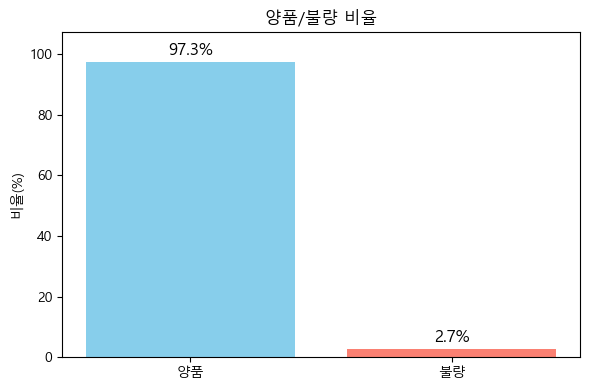

In [183]:
counts = df['judge'].value_counts(normalize=True) * 100
labels = counts.index
values = counts.values

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['skyblue', 'salmon'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=12)

plt.title('ÏñëÌíà/Î∂àÎüâ ÎπÑÏú®')
plt.ylabel('ÎπÑÏú®(%)')
plt.ylim(0, max(values) + 10)
plt.tight_layout()
plt.show()

### ‚ìê Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

In [184]:
categorical_cols = [col for col in df.select_dtypes(include='object') 
                    if col not in {'charge_id', 'cast_date', 'f_ext_date', 'hr_coil_id', 'hr_date', 'judge', 'ap_date'}]

#### - ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî

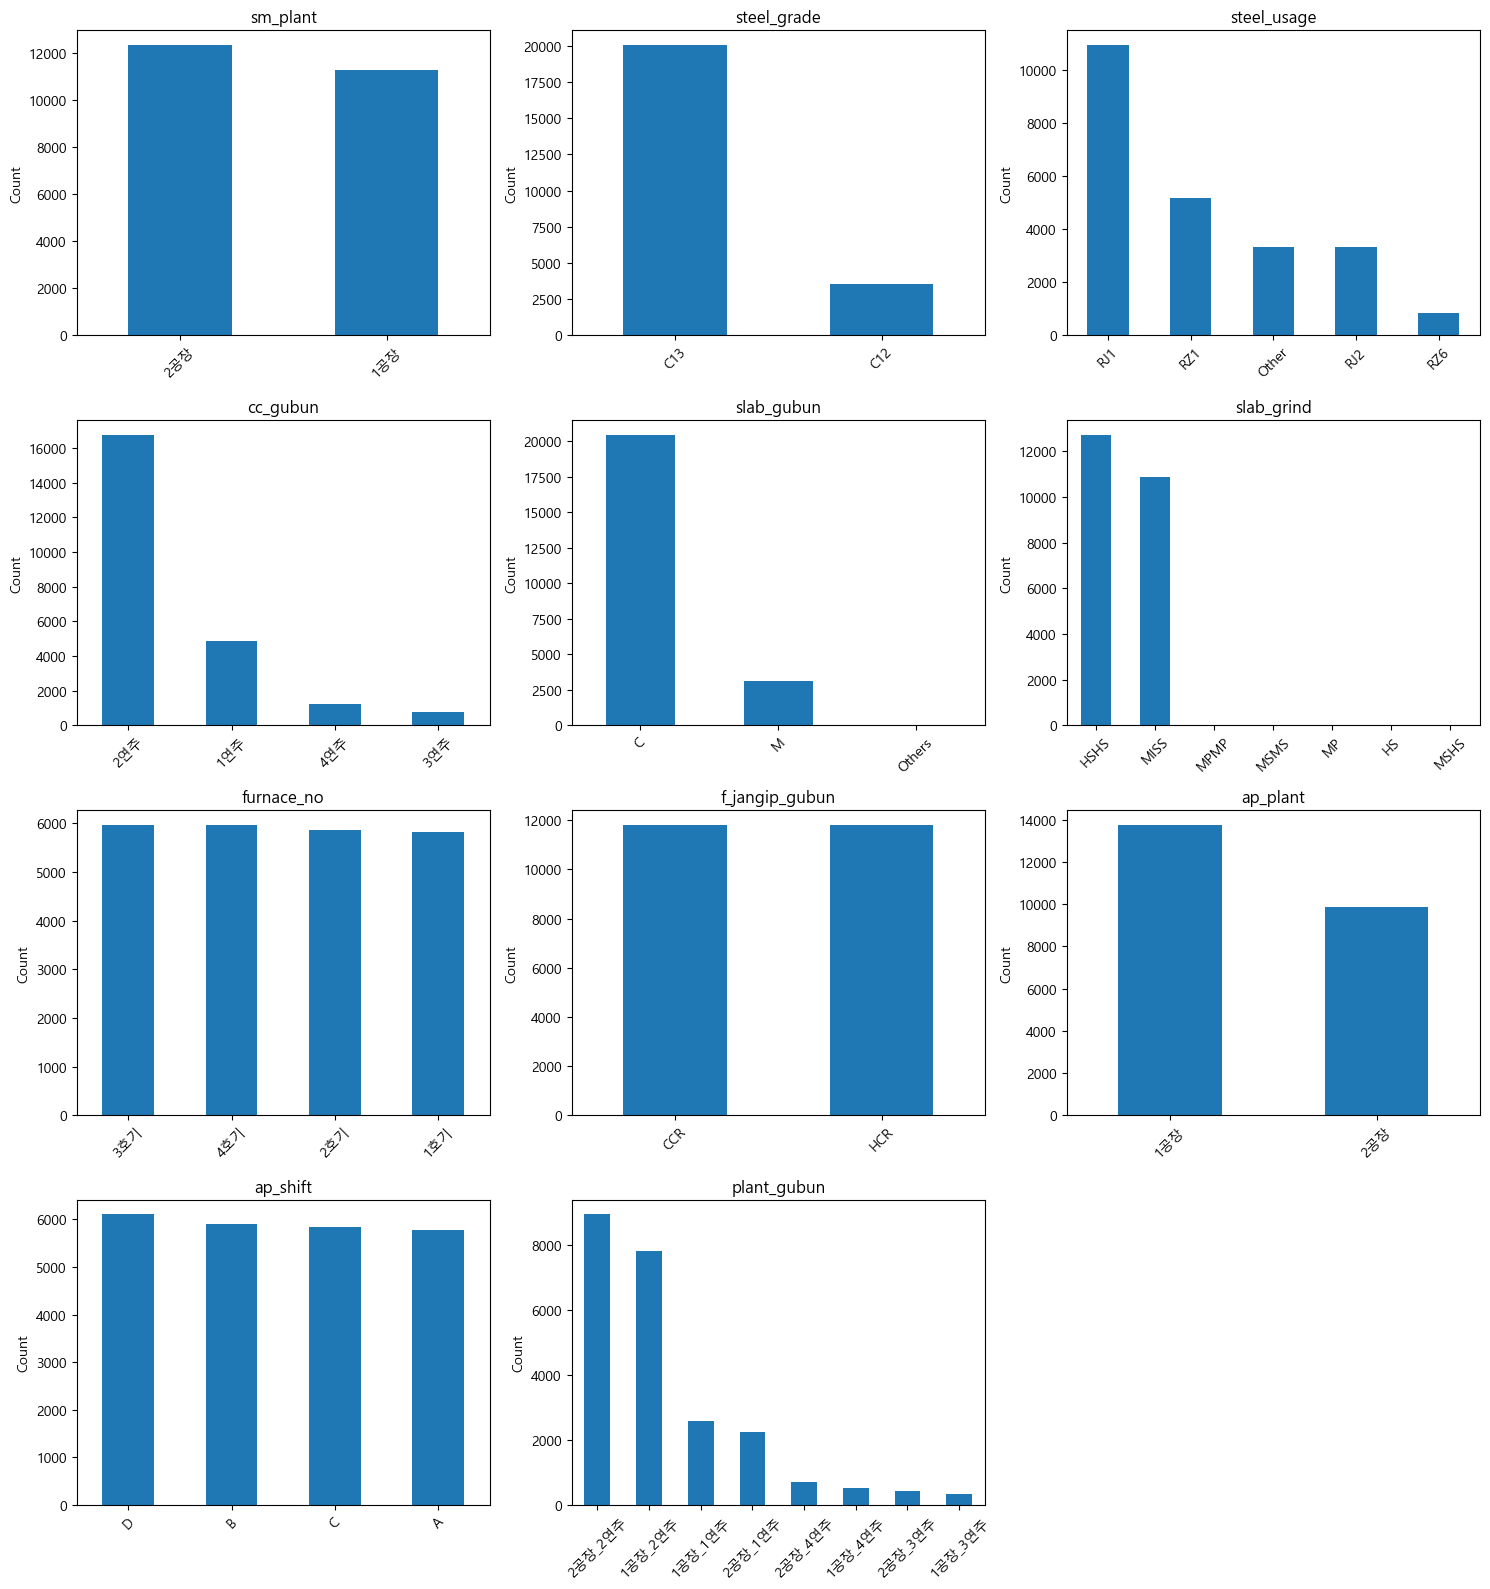

In [185]:
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### - Î≥ÄÏàòÎ≥Ñ Î∂àÎüâÎ•† ÏãúÍ∞ÅÌôî

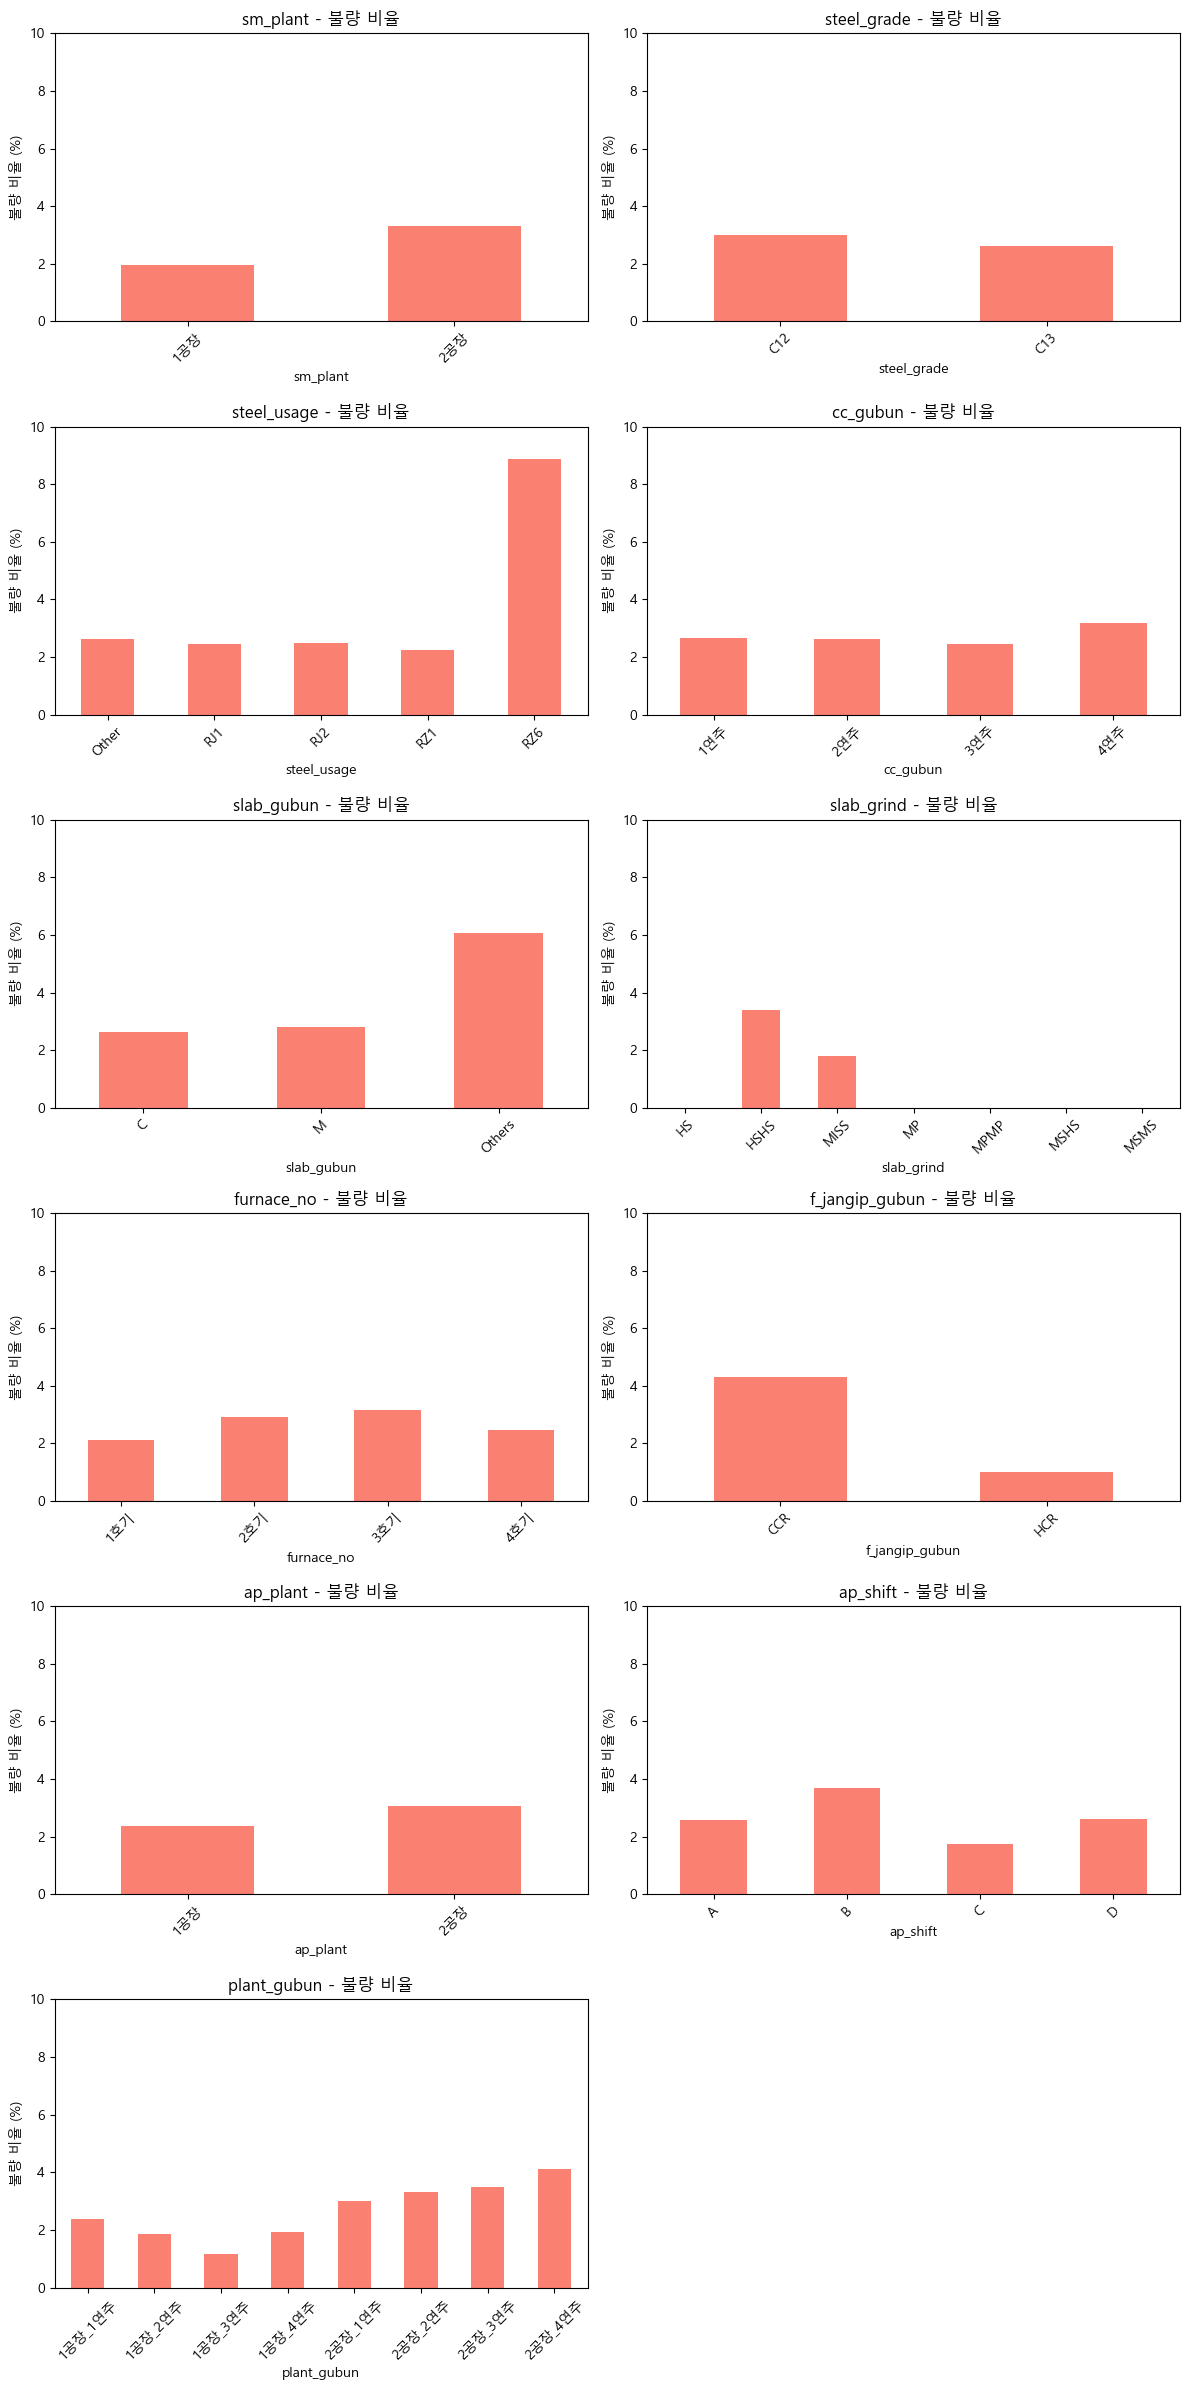

In [186]:
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    cross = pd.crosstab(df[col], df['judge'], normalize='index') * 100

    if 'Î∂àÎüâ' in cross.columns: 
        defect_rates = cross['Î∂àÎüâ']
        defect_rates.plot(kind='bar', ax=axes[i], color='salmon')

        axes[i].set_title(f"{col} - Î∂àÎüâ ÎπÑÏú®")
        axes[i].set_ylabel("Î∂àÎüâ ÎπÑÏú® (%)")
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylim(0, 10)
    else:
        axes[i].set_visible(False)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### ‚ìë Ïù¥ÏÇ∞Ìòï Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

In [187]:
def plot_boxplots(df, cols):
    n = len(cols)
    rows = (n + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'{col} Boxplot')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

In [188]:
def get_outliers_split_iqr(df, cols):
    outlier_summary = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        lower_outliers = df[df[col] < lower_bound]
        upper_outliers = df[df[col] > upper_bound]

        print(f" Î≥ÄÏàò: {col}")
        print(f" - Q1Î≥¥Îã§ ÏûëÏùÄ Í∞í Í∞úÏàò: {len(lower_outliers)}")
        print(f" - Q3Î≥¥Îã§ ÌÅ∞ Í∞í Í∞úÏàò: {len(upper_outliers)}")
        print(f" - Ï¥ù Ïù¥ÏÉÅÏπò Í∞úÏàò: {len(lower_outliers) + len(upper_outliers)}\n")

        outlier_summary[col] = {
            'Q1Î≥¥Îã§ ÏûëÏùå': len(lower_outliers),
            'Q3Î≥¥Îã§ ÌÅº': len(upper_outliers),
            'Ï¥ù Ïù¥ÏÉÅÏπò': len(lower_outliers) + len(upper_outliers),
            'Ïù¥ÏÉÅÏπò_Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ': pd.concat([lower_outliers, upper_outliers])
        }

    return outlier_summary

In [189]:
discrete_cols = ['delta_ferrite', 'slab_no', 'f_jangip_temp', 'f_pre_temp', 'f_heat_temp', 'f_sock_temp', 'f_pre_interval',
                'f_heat_interval', 'f_sock_interval', 'f_ext_time', 'hr_width', 'rm4_temp', 'rm_pitch', 'slab_width', 'ap_width']

#### - Î∞ïÏä§ÌîåÎ°Ø ÏãúÍ∞ÅÌôî

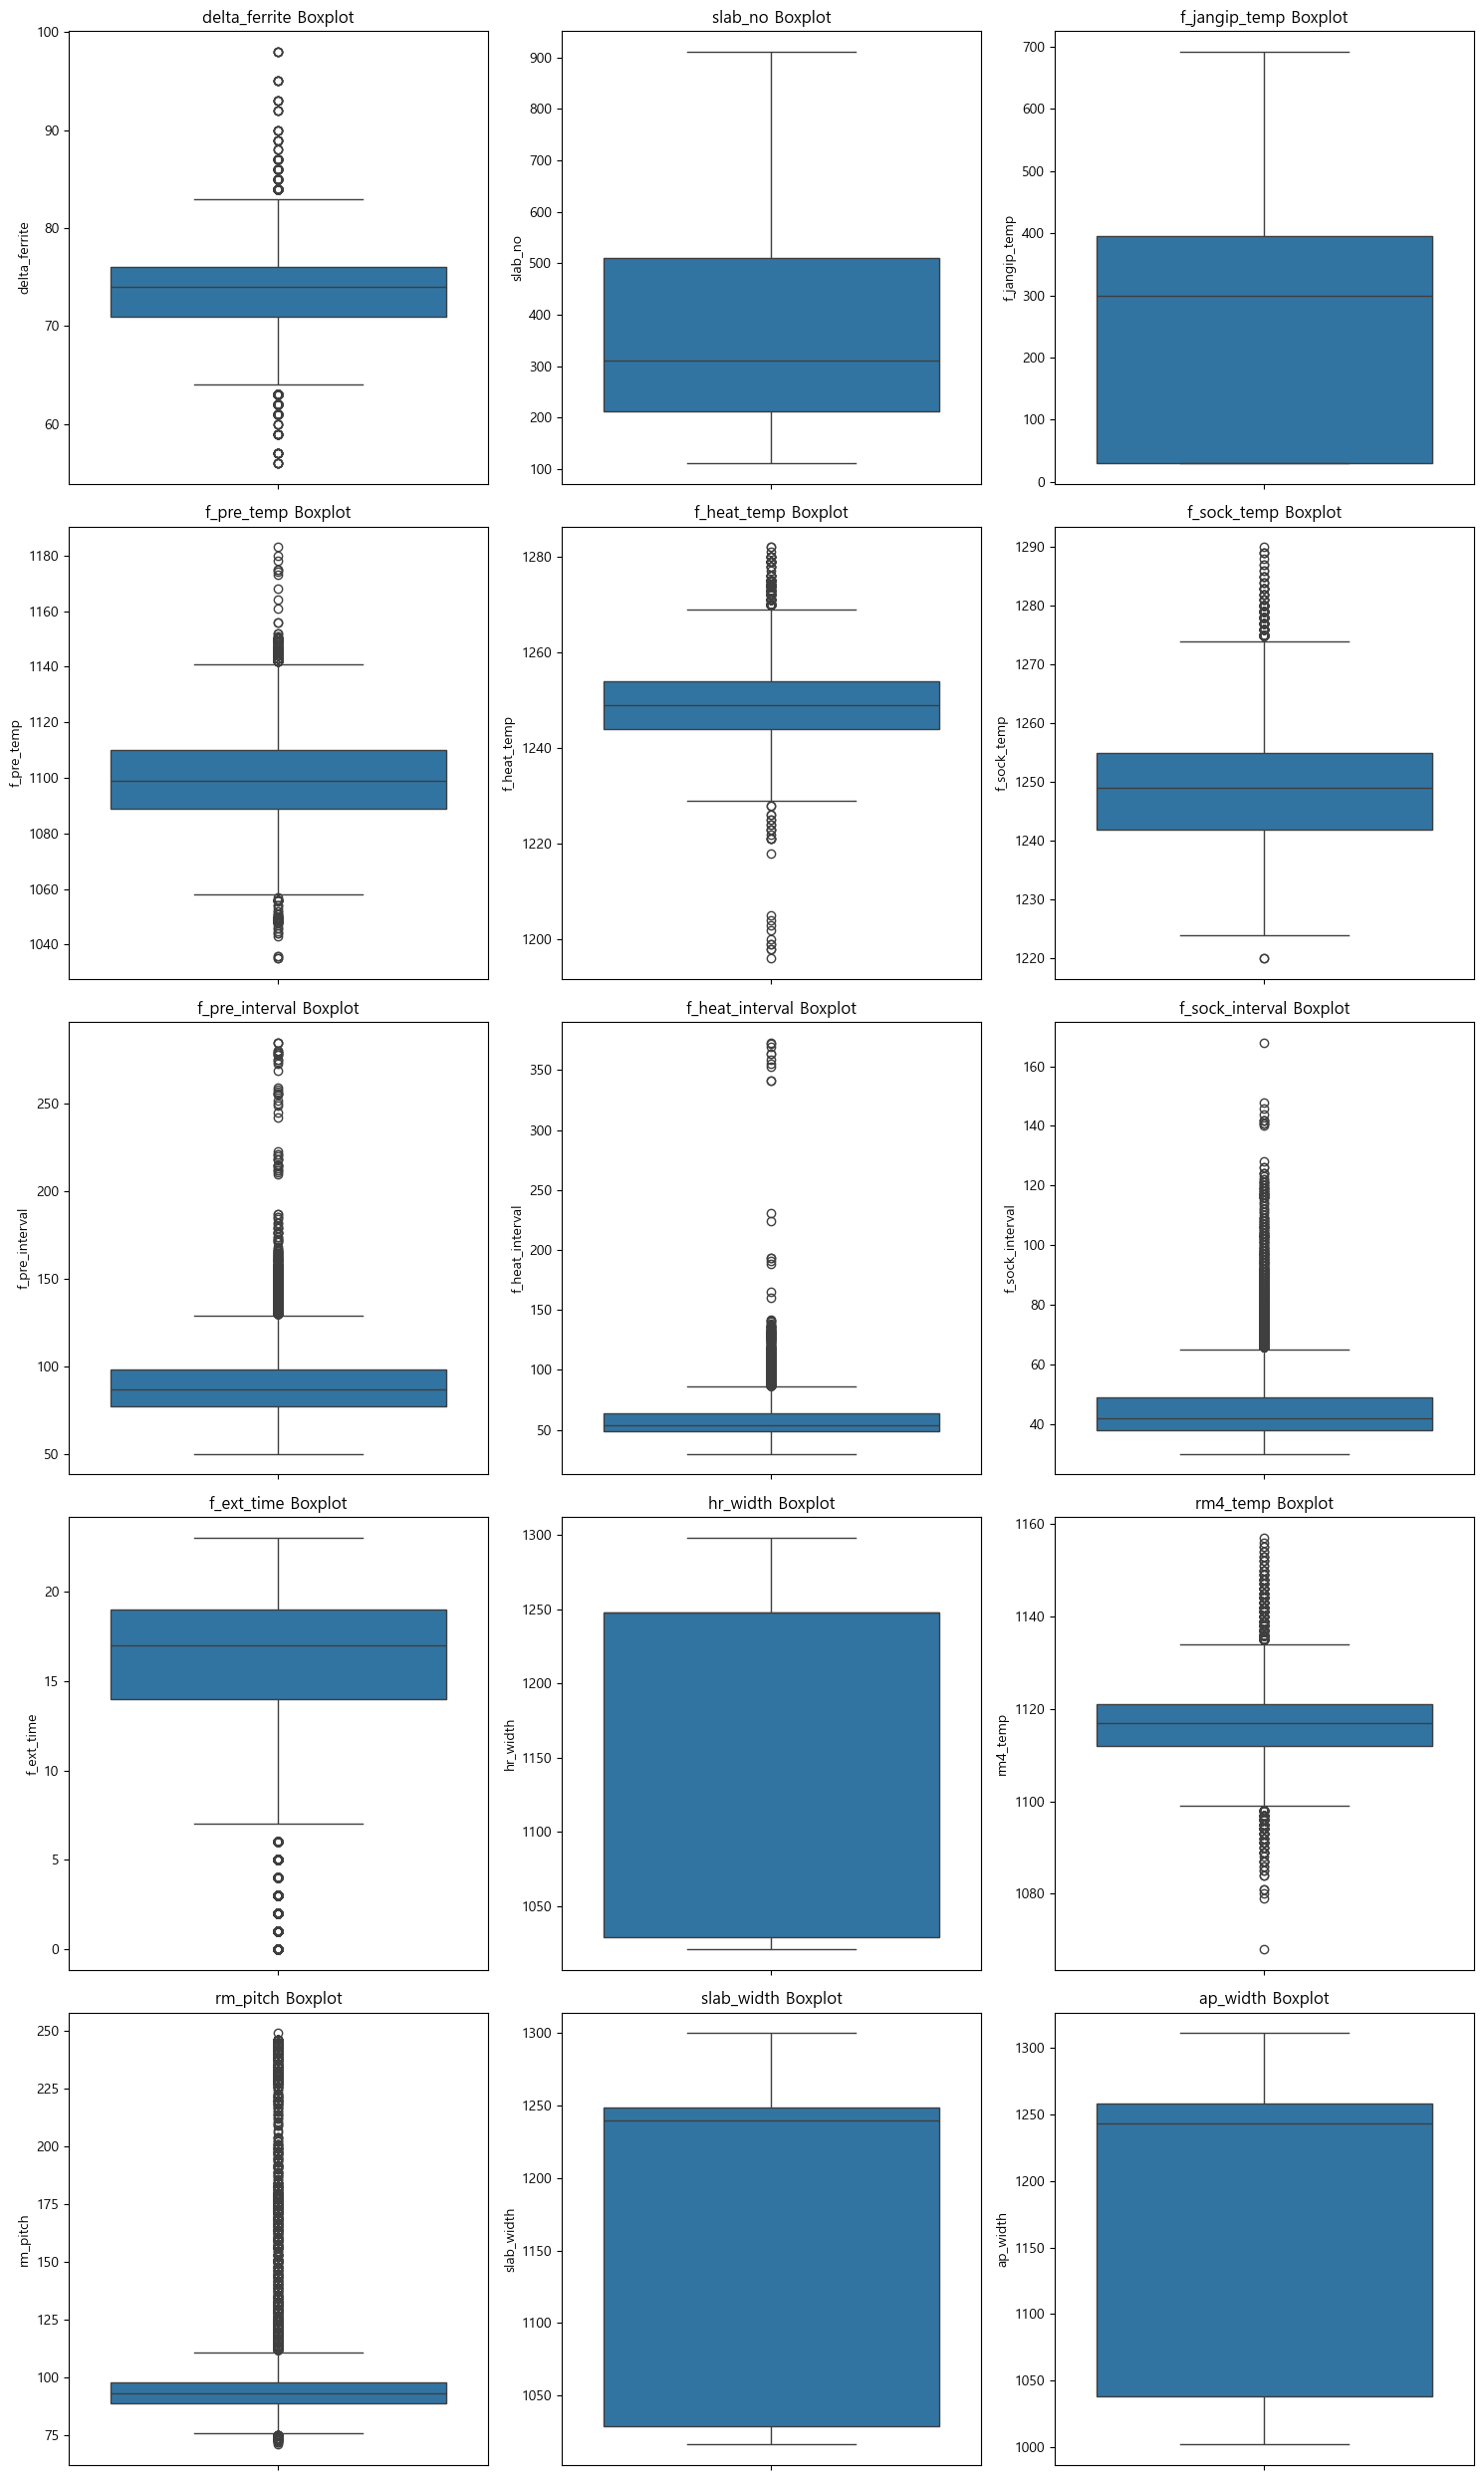

In [190]:
# Î∞ïÏä§ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plot_boxplots(df, discrete_cols)

#### - ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî

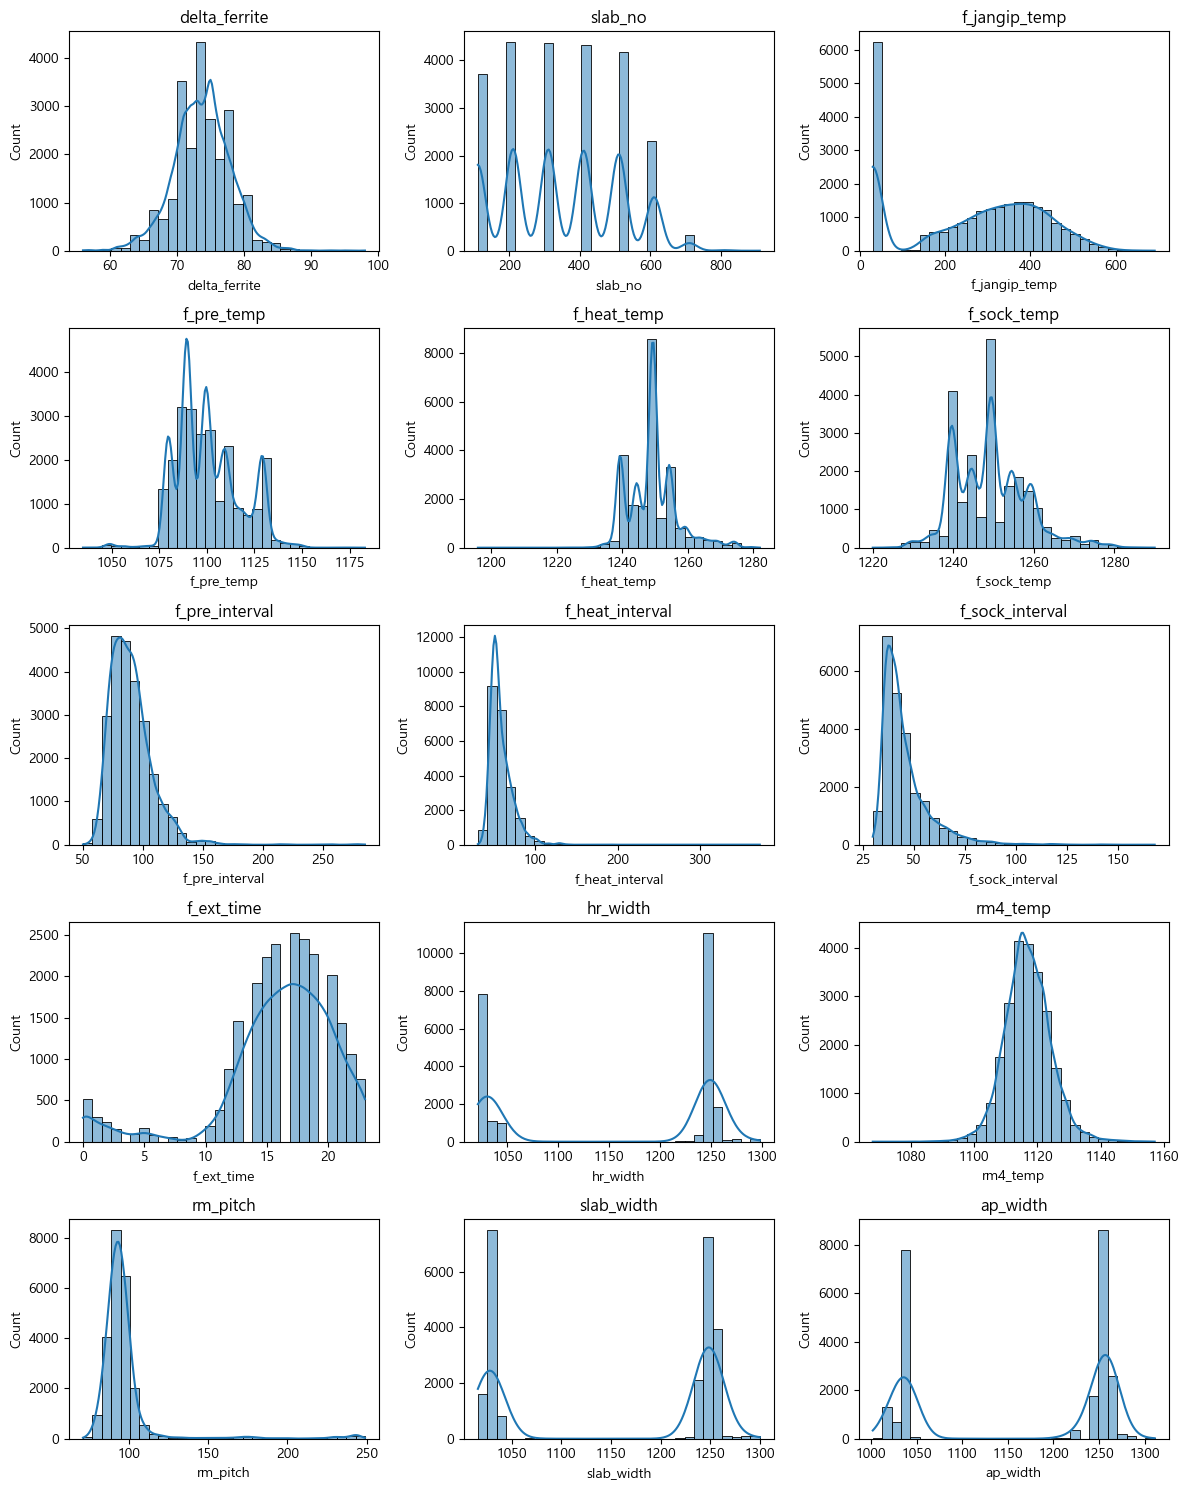

In [191]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî
n = len(discrete_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(discrete_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [192]:
# discrete_outlier_info = get_outliers_split_iqr(df, discrete_cols)
# discrete_outlier_info

### ‚ìí Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

In [193]:
continuous_cols = [
    'ingre_cr', 'ingre_ni', 'ingre_s', 'tundish_temp',
    'mlac_ratio', 'f_bfg', 'f_cog', 'f_ldg',
    'f_bfg_per', 'f_cog_per', 'f_ldg_per',
    'hr_thick', 'ap_thick', 'ap_line_speed', 'total_time', 'coil_delay_time', 'slab_delay_time','etching_thick' 
]

#### - Î∞ïÏä§ÌîåÎ°Ø ÏãúÍ∞ÅÌôî

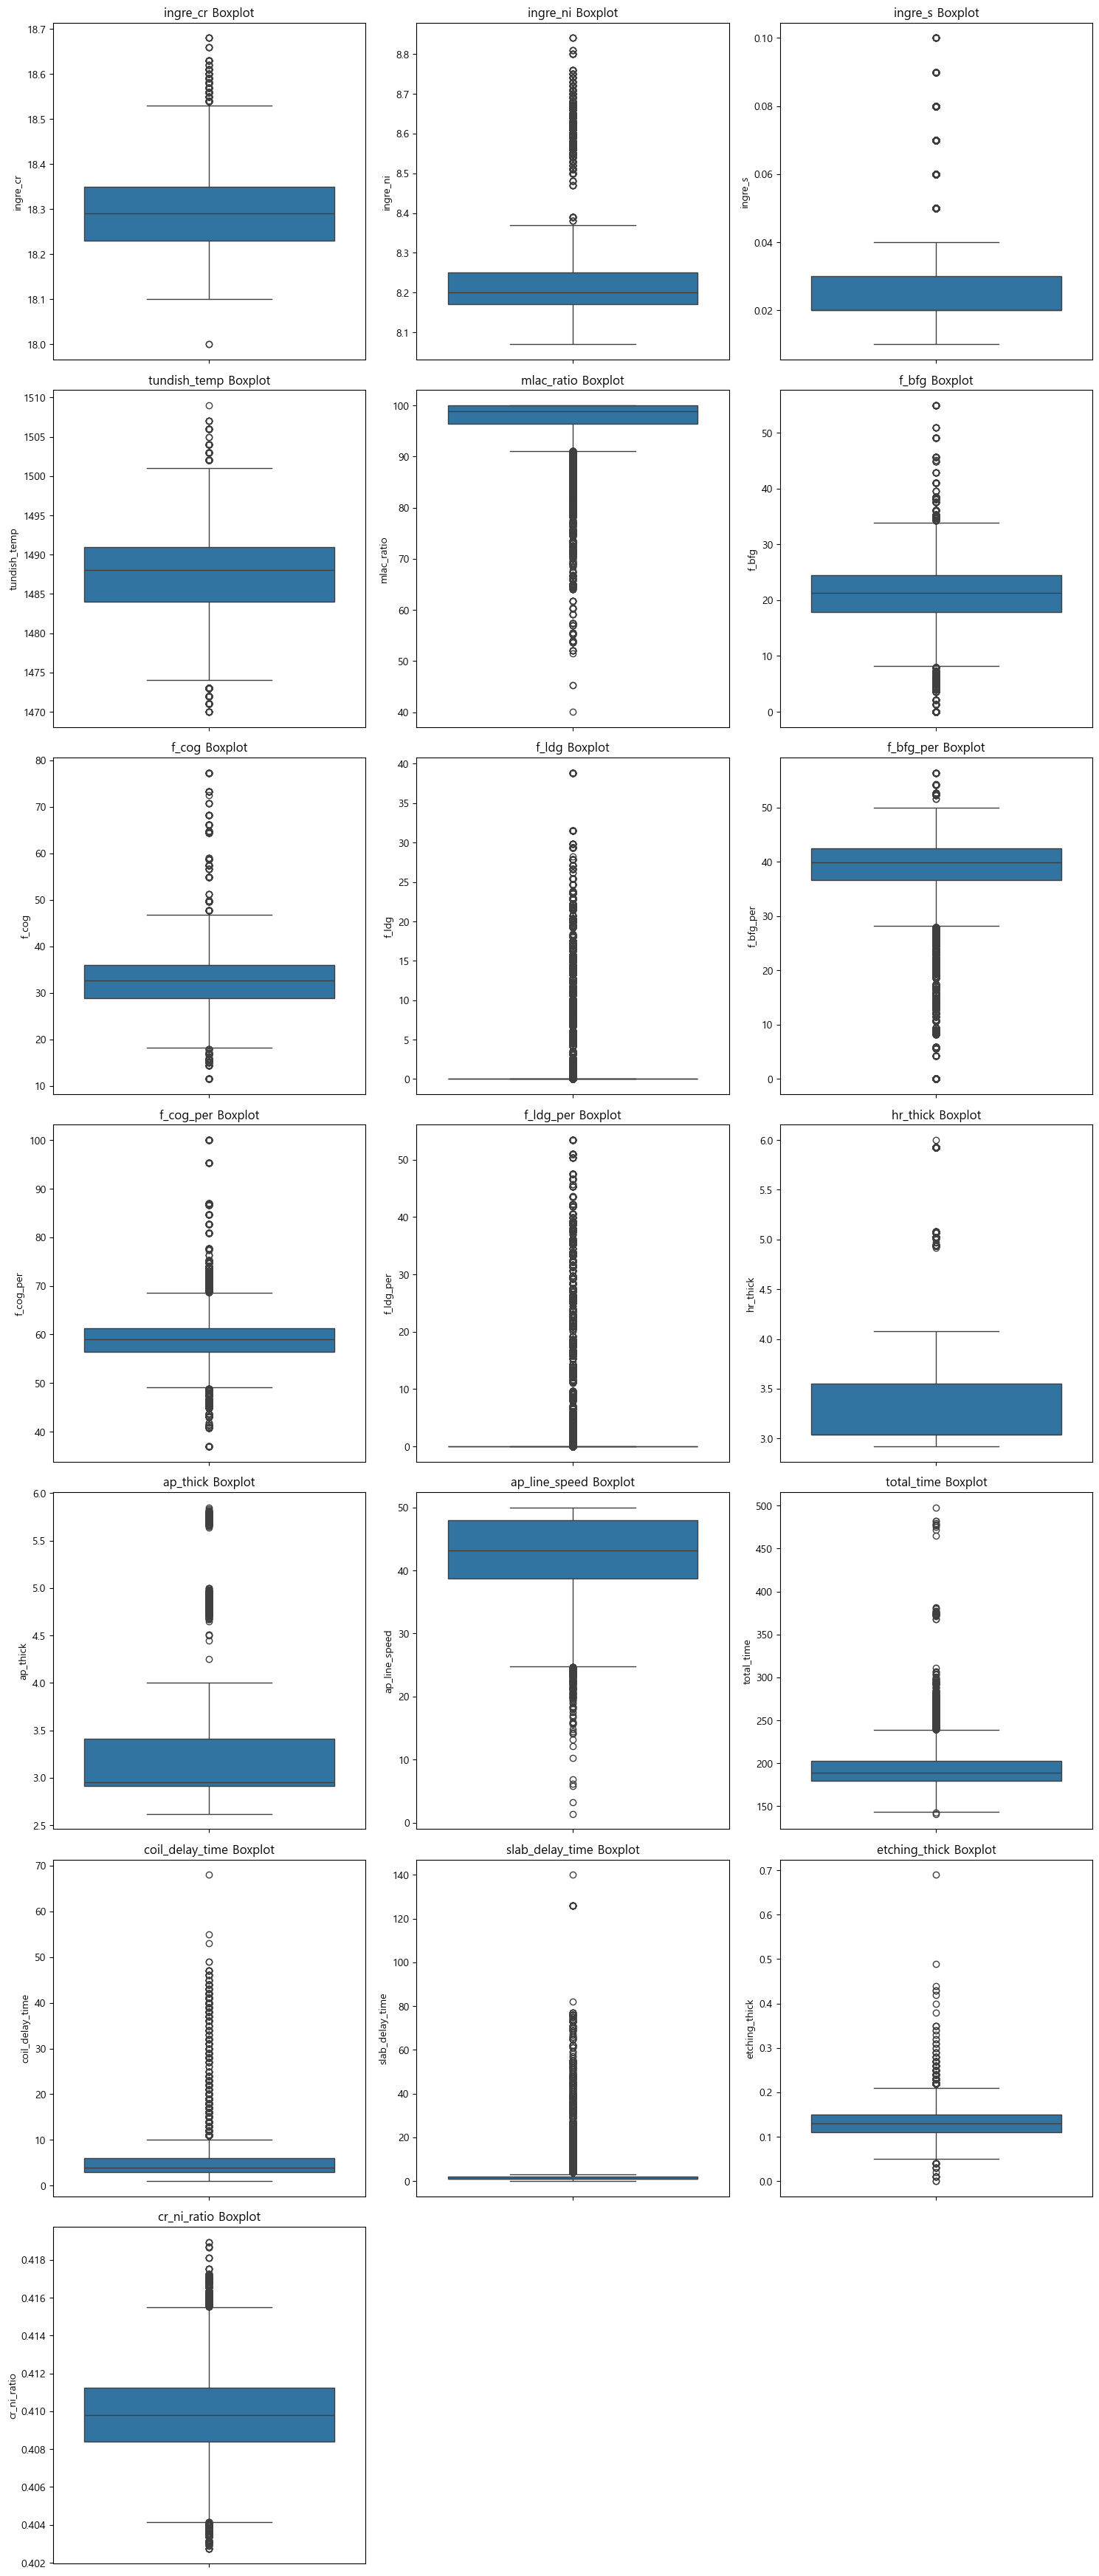

In [194]:
# Î∞ïÏä§ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plot_boxplots(df, continuous_cols)

#### - ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî

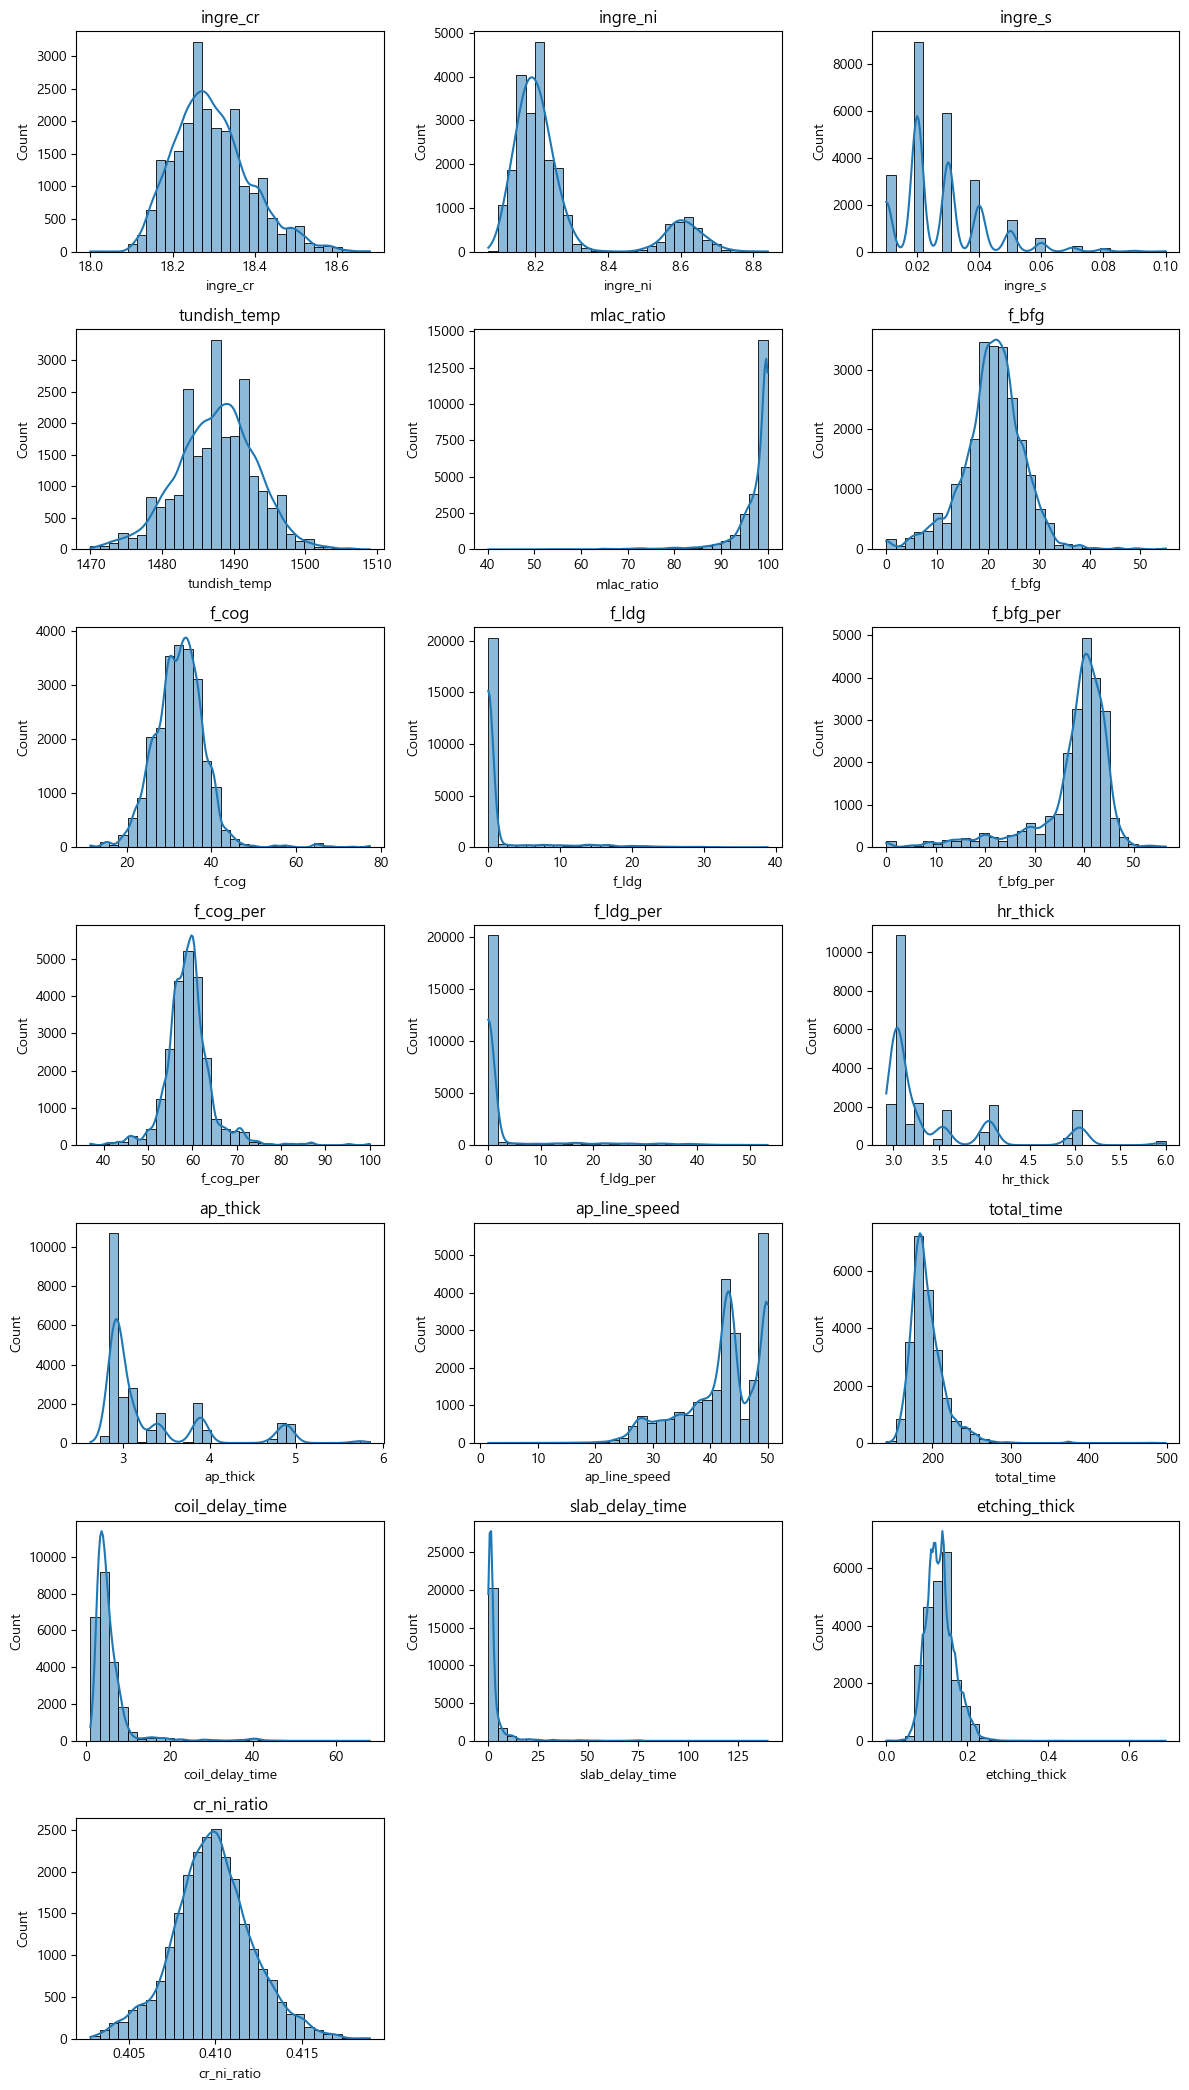

In [195]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî
n = len(continuous_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(continuous_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [196]:
# continuous_outlier_info = get_discrete_outliers_split_iqr(df, continuous_cols)
# continuous_outlier_info

# 4. EDA
- Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞
  - Ï†ïÍ∑úÏÑ±ÌÖåÏä§Ìä∏(`D‚ÄôAgostino-Pearson`), Îì±Î∂ÑÏÇ∞ÏÑ±ÌÖåÏä§Ìä∏(`Levene Test`) 
  - Ï†ïÍ∑úÏÑ±, Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°± O -> `2 sample t-test`
  - Ï†ïÍ∑úÏÑ±, Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°± X -> `Mann Whiteny U-test`
- Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞
  - Í∏∞ÎåÄÎèÑÏàòÌëú 5ÎØ∏ÎßåÏù∏ ÏÖÄ 20% ÎØ∏Îßå -> `Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ï`
  - Í∏∞ÎåÄÎèÑÏàòÌëú 5ÎØ∏ÎßåÏù∏ ÏÖÄ 20% Ïù¥ÏÉÅ -> `Fisher` (2x2 ÌëúÏùºÍ≤ΩÏö∞), `MonteCarlo`

### ‚ìê Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞: ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù

In [197]:
from scipy.stats import normaltest, levene, ttest_ind, mannwhitneyu, shapiro, ranksums

cols = list(df.select_dtypes(include=['int', 'float']).columns)

for col in cols:
    print(f"‚úÖ {col}")
    # Îç∞Ïù¥ÌÑ∞ Í∑∏Î£π ÎÇòÎàÑÍ∏∞
    group_bad = df[df['judge'] == 'Î∂àÎüâ'][col]
    group_good = df[df['judge'] == 'ÏñëÌíà'][col]
    
    # [1] Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï (D‚ÄôAgostino-Pearson)
    print("[1] Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï (D‚ÄôAgostino-Pearson Test)")
    stat_bad, p_bad = normaltest(group_bad)
    stat_good, p_good = normaltest(group_good)
    print(f"Î∂àÎüâ Í∑∏Î£π: stat = {stat_bad:.4f}, p = {p_bad:.4f} ‚Üí {'Ï†ïÍ∑úÏÑ± ÎßåÏ°±' if p_bad > 0.05 else 'Ï†ïÍ∑úÏÑ± ÏúÑÎ∞∞'}")
    print(f"ÏñëÌíà Í∑∏Î£π: stat = {stat_good:.4f}, p = {p_good:.4f} ‚Üí {'Ï†ïÍ∑úÏÑ± ÎßåÏ°±' if p_good > 0.05 else 'Ï†ïÍ∑úÏÑ± ÏúÑÎ∞∞'}")
    
    # [2] Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï (Levene Test)
    print("\n[2] Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï (Levene Test)")
    levene_result = levene(group_bad, group_good)
    equal_var = levene_result.pvalue > 0.05
    print(f"Levene stat = {levene_result.statistic:.4f}, p = {levene_result.pvalue:.4f} ‚Üí {'Îì±Î∂ÑÏÇ∞ÏÑ± ÏûàÏùå' if equal_var else 'Îì±Î∂ÑÏÇ∞ÏÑ± ÏóÜÏùå'} (equal_var={equal_var})")
    
    # [3] ÌèâÍ∑† Ï∞®Ïù¥ Í≤ÄÏ†ï (t-test)
    print("\n[3] ÌèâÍ∑† Ï∞®Ïù¥ Í≤ÄÏ†ï (t-test)")
    ttest_result = ttest_ind(group_bad, group_good, equal_var=equal_var)
    print(f"t = {ttest_result.statistic:.4f}, p = {ttest_result.pvalue:.4f} ‚Üí {'Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏûàÏùå' if ttest_result.pvalue < 0.05 else 'Ï∞®Ïù¥ ÏóÜÏùå'}")
    
    # [4] ÎπÑÎ™®Ïàò Í≤ÄÏ†ï (Mann-Whitney U Test)
    print("\n[4] ÎπÑÎ™®Ïàò Í≤ÄÏ†ï (Mann-Whitney U Test)")
    mw_stat, mw_p = mannwhitneyu(group_bad, group_good, alternative='two-sided')
    print(f"Mann-Whitney U = {mw_stat:.4f}, p = {mw_p:.4f} ‚Üí {'Ï§ëÏïôÍ∞í Ï∞®Ïù¥ Ïú†ÏùòÌï®' if mw_p < 0.05 else 'Ï∞®Ïù¥ ÏóÜÏùå'}")

    # [5] ÎπÑÎ™®Ïàò Í≤ÄÏ†ï (Wilcoxon Rank-Sum Test)
    print("\n[5] ÎπÑÎ™®Ïàò Í≤ÄÏ†ï (Wilcoxon Rank-Sum Test)")
    rs_stat, rs_p = ranksums(group_bad, group_good)
    print(f"Rank-Sum z = {rs_stat:.4f}, p = {rs_p:.4f} ‚Üí {'Ï§ëÏïôÍ∞í Ï∞®Ïù¥ Ïú†ÏùòÌï®' if rs_p < 0.05 else 'Ï∞®Ïù¥ ÏóÜÏùå'}")
    
    print('\n\n')

‚úÖ delta_ferrite
[1] Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï (D‚ÄôAgostino-Pearson Test)
Î∂àÎüâ Í∑∏Î£π: stat = 127.6544, p = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏúÑÎ∞∞
ÏñëÌíà Í∑∏Î£π: stat = 311.1413, p = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏúÑÎ∞∞

[2] Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï (Levene Test)
Levene stat = 23.3072, p = 0.0000 ‚Üí Îì±Î∂ÑÏÇ∞ÏÑ± ÏóÜÏùå (equal_var=False)

[3] ÌèâÍ∑† Ï∞®Ïù¥ Í≤ÄÏ†ï (t-test)
t = -0.0170, p = 0.9864 ‚Üí Ï∞®Ïù¥ ÏóÜÏùå

[4] ÎπÑÎ™®Ïàò Í≤ÄÏ†ï (Mann-Whitney U Test)
Mann-Whitney U = 6892467.5000, p = 0.0427 ‚Üí Ï§ëÏïôÍ∞í Ï∞®Ïù¥ Ïú†ÏùòÌï®

[5] ÎπÑÎ™®Ïàò Í≤ÄÏ†ï (Wilcoxon Rank-Sum Test)
Rank-Sum z = -2.0205, p = 0.0433 ‚Üí Ï§ëÏïôÍ∞í Ï∞®Ïù¥ Ïú†ÏùòÌï®



‚úÖ ingre_cr
[1] Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï (D‚ÄôAgostino-Pearson Test)
Î∂àÎüâ Í∑∏Î£π: stat = 56.1695, p = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏúÑÎ∞∞
ÏñëÌíà Í∑∏Î£π: stat = 1179.6786, p = 0.0000 ‚Üí Ï†ïÍ∑úÏÑ± ÏúÑÎ∞∞

[2] Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï (Levene Test)
Levene stat = 7.9784, p = 0.0047 ‚Üí Îì±Î∂ÑÏÇ∞ÏÑ± ÏóÜÏùå (equal_var=False)

[3] ÌèâÍ∑† Ï∞®Ïù¥ Í≤ÄÏ†ï (t-test)
t = -2.0860, p = 0.0374 ‚Üí Ïú†ÏùòÌïú Ï∞®Ïù

### ‚ìë Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞: ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù

In [198]:
def monte_carlo_chi2_test(df, category_col, target_col, n_simulations=10000, seed=42):
    """
    Monte Carlo Î∞©ÏãùÏùò Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï
    - df: DataFrame
    - category_col: Î≤îÏ£ºÌòï ÏÑ§Î™Ö Î≥ÄÏàò (Ïòà: 'slab_grind')
    - target_col: Ïù¥Ìï≠ Î™©Ìëú Î≥ÄÏàò (Ïòà: 'judge')
    - n_simulations: ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌöüÏàò
    """
    np.random.seed(seed)
    
    # Î∂ÑÌï†Ìëú ÏÉùÏÑ±
    table = pd.crosstab(df[category_col], df[target_col])
    observed = table.to_numpy()

    # Ïã§Ï†ú Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞
    chi2_actual, _, _, _ = chi2_contingency(observed, correction=False)

    # ÏãúÎÆ¨Î†àÏù¥ÏÖò
    total = observed.sum()
    shape = observed.shape
    greater_count = 0

    for _ in range(n_simulations):
        simulated = np.random.multinomial(total, [1 / (shape[0] * shape[1])] * (shape[0] * shape[1]))
        simulated = simulated.reshape(shape)

        try:
            chi2_sim, _, _, _ = chi2_contingency(simulated, correction=False)
            if chi2_sim >= chi2_actual:
                greater_count += 1
        except:
            continue

    # Monte Carlo p-value Í≥ÑÏÇ∞
    p_value = greater_count / n_simulations

    return {
        'chi2_statistic': chi2_actual,
        'monte_carlo_p_value': p_value,
        'contingency_table': table
    }

In [199]:
from scipy.stats import chi2_contingency, fisher_exact, permutation_test

cols = list(df.select_dtypes(include=['object']).columns)

for col in cols:
    print(f"üí† {col}")
    # Îç∞Ïù¥ÌÑ∞ Í∑∏Î£π ÎÇòÎàÑÍ∏∞
    # colÏôÄ judge Í∞Ñ ÍµêÏ∞®Ìëú ÎßåÎì§Í∏∞
    contingency = pd.crosstab(df[col], df['judge'])
    
    print(f" [1] ÍµêÏ∞®Ìëú ({col} vs judge):")
    print(contingency)
    
    # Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Ïã§Ìñâ
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    print("\n [2] Í∏∞ÎåÄÎπàÎèÑ (Expected Frequencies):")
    expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)
    print(expected_df)
    
    # Í∏∞ÎåÄÎπàÎèÑ Ï°∞Í±¥ ÌôïÏù∏
    low_expected = (expected < 5).sum()
    total_cells = expected.size
    low_ratio = low_expected / total_cells
    
    print(f"\n Í∏∞ÎåÄÎπàÎèÑ 5 ÎØ∏Îßå ÏÖÄ ÎπÑÏú®: {low_ratio:.2%}")
    if low_ratio > 0.2 or (expected < 1).any():
        print(" Í∏∞ÎåÄÎπàÎèÑ Ï°∞Í±¥ ÏúÑÎ∞ò ‚Üí Fisher Ï†ïÌôï Í≤ÄÏ†ï ÎòêÎäî Î≤îÏ£º ÌÜµÌï© ÌïÑÏöî")
        # 2x2 ÍµêÏ∞®ÌëúÏùº Í≤ΩÏö∞Îßå Fisher‚Äôs Exact Test ÏÇ¨Ïö© Í∞ÄÎä•
        if contingency.shape == (2, 2):
            print("\n [3] FisherÏùò Ï†ïÌôï Í≤ÄÏ†ï:")
            oddsratio, p_fisher = fisher_exact(contingency)
            print(f"p-value (Fisher) = {p_fisher:.4f}\n")
            
        print(" Í∏∞ÎåÄÎπàÎèÑ Ï°∞Í±¥ ÏúÑÎ∞òÏãú -> Î™¨ÌÖåÏπ¥Î•ºÎ°ú Í≤∞Í≥º")
        result = monte_carlo_chi2_test(df, category_col=col, target_col='judge')
        print("Contingency Table:")
        print(result['contingency_table'])
        print(f"\nChi¬≤ ÌÜµÍ≥ÑÎüâ: {result['chi2_statistic']:.4f}")
        print(f"Monte Carlo Í∏∞Î∞ò p-value: {result['monte_carlo_p_value']:.4f}")
    else:        
        print("\n [3] Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º:")
        print(f"Chi2 = {chi2:.4f}, p = {p:.4f}")
        if p < 0.05:
            print(f" Ïú†ÏùòÎØ∏Ìïú Í¥ÄÎ†®ÏÑ± ÏûàÏùå ‚Üí {col}ÏùÄ Î∂àÎüâÎ•†Í≥º Í¥ÄÎ†® ÏûàÏùå")
        else:
            print(f" ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Í¥ÄÎ†® ÏóÜÏùå ‚Üí {col}ÏùÄ Î∂àÎüâÎ•†Ïóê ÏòÅÌñ• ÏóÜÏùå")
        
    print('\n\n')

üí† sm_plant
 [1] ÍµêÏ∞®Ìëú (sm_plant vs judge):
judge      Î∂àÎüâ     ÏñëÌíà
sm_plant            
1Í≥µÏû•       220  11059
2Í≥µÏû•       409  11941

 [2] Í∏∞ÎåÄÎπàÎèÑ (Expected Frequencies):
judge            Î∂àÎüâ           ÏñëÌíà
sm_plant                        
1Í≥µÏû•       300.24508  10978.75492
2Í≥µÏû•       328.75492  12021.24508

 Í∏∞ÎåÄÎπàÎèÑ 5 ÎØ∏Îßå ÏÖÄ ÎπÑÏú®: 0.00%

 [3] Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º:
Chi2 = 41.6320, p = 0.0000
 Ïú†ÏùòÎØ∏Ìïú Í¥ÄÎ†®ÏÑ± ÏûàÏùå ‚Üí sm_plantÏùÄ Î∂àÎüâÎ•†Í≥º Í¥ÄÎ†® ÏûàÏùå



üí† charge_id
 [1] ÍµêÏ∞®Ìëú (charge_id vs judge):
judge      Î∂àÎüâ  ÏñëÌíà
charge_id        
CH42126     0   2
CH42157     0   1
CH42171     0   1
CH42193     0   1
CH42207     0   1
...        ..  ..
CH87497     0   1
CH87508     0   5
CH87509     0   5
CH87510     0   3
CH87516     0   1

[5631 rows x 2 columns]

 [2] Í∏∞ÎåÄÎπàÎèÑ (Expected Frequencies):
judge            Î∂àÎüâ        ÏñëÌíà
charge_id                    
CH42126    0.053240  1.946760
CH42157  

### ‚ìí ÌûàÌä∏Îßµ

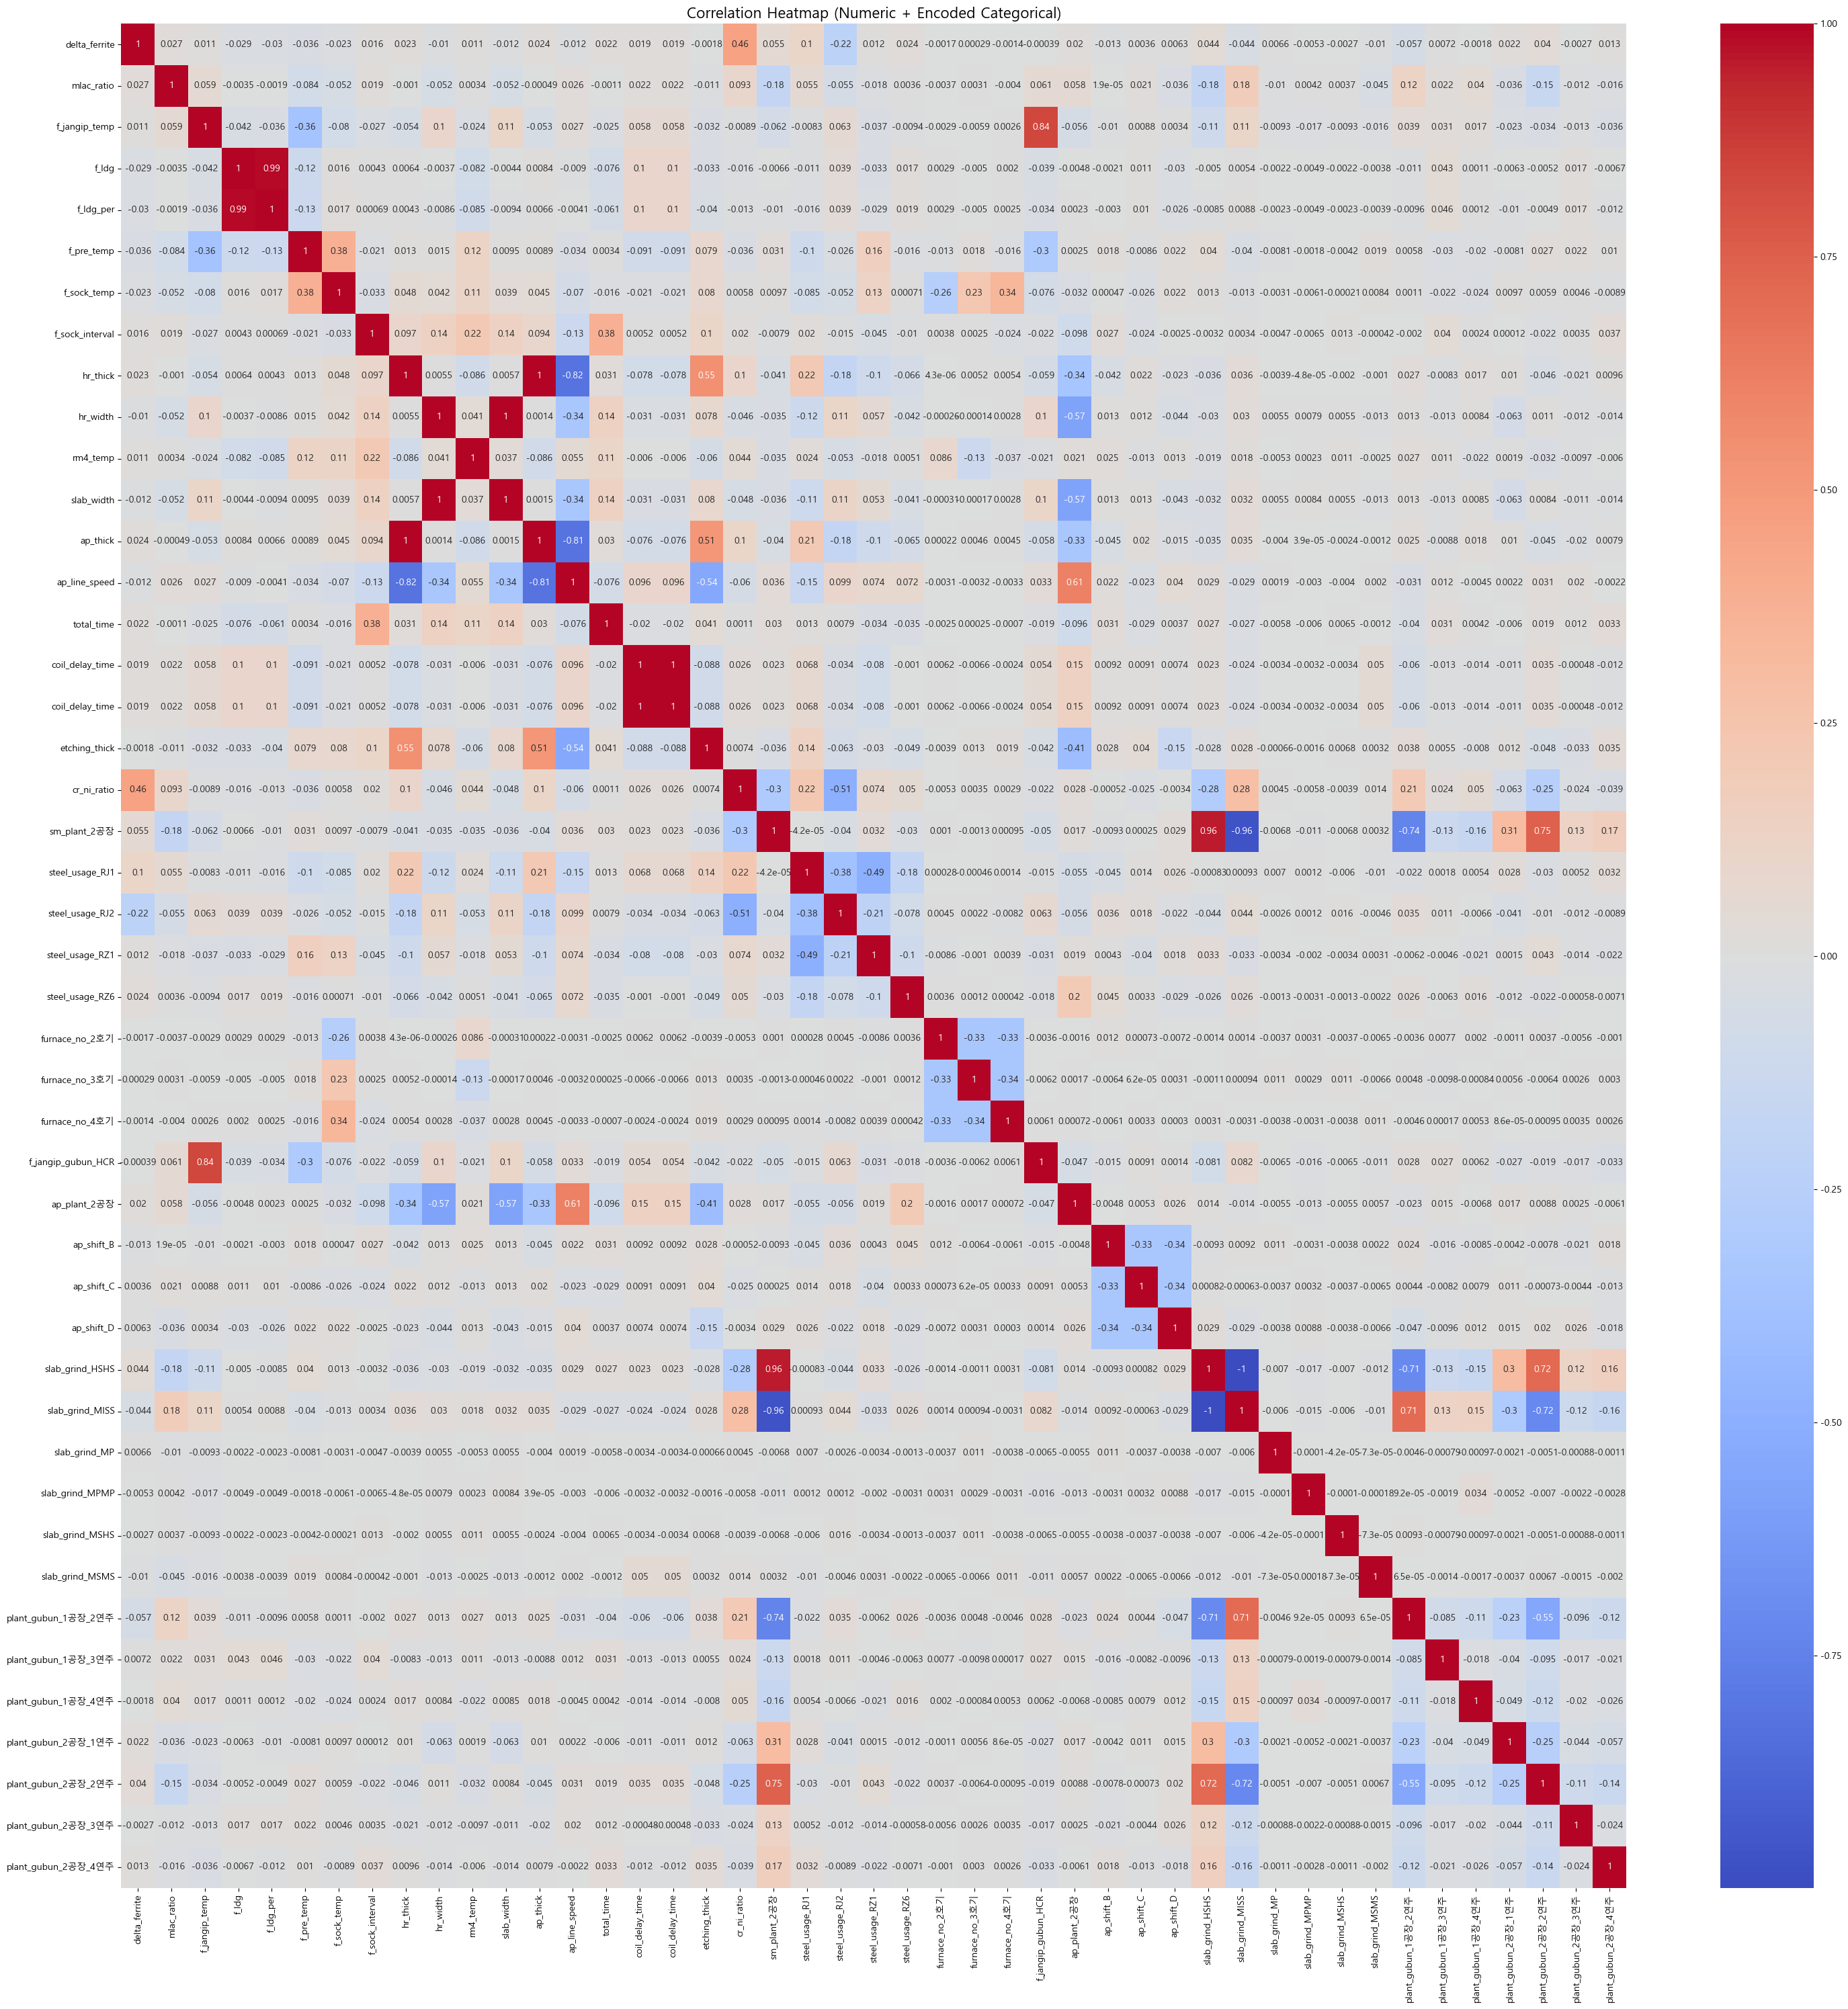

In [201]:
categorical_cols = [
    'sm_plant', 'steel_usage', 'furnace_no', 'f_jangip_gubun',
    'ap_plant', 'ap_shift', 'slab_grind', 'plant_gubun'
]

numeric_cols = [
    'delta_ferrite', 'mlac_ratio', 'f_jangip_temp', 'f_ldg', 'f_ldg_per',
    'f_pre_temp', 'f_sock_temp', 'f_sock_interval', 'hr_thick', 'hr_width',
    'rm4_temp', 'slab_width', 'ap_thick', 'ap_line_speed',
    'total_time', 'coil_delay_time', 'coil_delay_time', 'etching_thick', 'cr_ni_ratio'
]

df_encoded_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)
df_for_heatmap = pd.concat([df[numeric_cols], df_encoded_categorical], axis=1)

plt.figure(figsize=(30, 30))
sns.heatmap(df_for_heatmap.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap (Numeric + Encoded Categorical)", fontsize=16)
plt.tight_layout()
plt.show()

### ‚ìì VIF(Îã§Ï§ëÍ≥µÏÑ†ÏÑ±) ÌôïÏù∏

In [ ]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.api import add_constant

# def calculate_vif(df):
#     df_encoded = pd.get_dummies(df, drop_first=True)
#     # df_encoded = add_constant(df_encoded)

#     vif_data = pd.DataFrame({
#         'Variable': df_encoded.columns,
#         'VIF': [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]
#     })

#     return vif_data.sort_values(by="VIF", ascending=False)

### ‚ìî plant_gubunÎ≥Ñ, ÏõîÎ≥Ñ ÏõêÏù∏ ÌååÏïÖ

In [724]:
## Î™®Îì† Ïó¥ Î≥¥Í∏∞ ÏòµÏÖò
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.width', None)

new_df = df.groupby('plant_gubun').mean(numeric_only=True)
new_df.loc[['1Í≥µÏû•_3Ïó∞Ï£º', '2Í≥µÏû•_4Ïó∞Ï£º']]

delta_ferrite   ingre_cr  ingre_ni   ingre_s  tundish_temp  \
plant_gubun                                                               
1Í≥µÏû•_3Ïó∞Ï£º           7.398547  18.315116  8.254942  0.035000   1487.343023   
2Í≥µÏû•_4Ïó∞Ï£º           7.403960  18.277737  8.268331  0.023154   1487.210750   

             mlac_ratio     slab_no  f_jangip_temp      f_bfg      f_cog  \
plant_gubun                                                                
1Í≥µÏû•_3Ïó∞Ï£º       98.021221  342.395349     305.773256  18.643898  31.183895   
2Í≥µÏû•_4Ïó∞Ï£º       96.648798  357.958982     230.957567  20.792003  32.757703   

                f_ldg  f_bfg_per  f_cog_per  f_ldg_per  f_pre_temp  \
plant_gubun                                                          
1Í≥µÏû•_3Ïó∞Ï£º      3.566081  34.988077  58.536774   6.475148  1096.56686   
2Í≥µÏû•_4Ïó∞Ï£º      1.552791  37.834863  59.665986   2.499151  1101.64215   

             f_heat_temp  f_sock_temp  f_pre_interval  f_heat_interval  \
plant_gubun                                                              
1Í≥µÏû•_3Ïó∞Ï£º      1247.709302  1247.680233       92.427326        57.406977   
2Í≥µÏû•_4Ïó∞Ï£º      1248.579915  1248.835926       90.684583        59.056577   

             f_sock_interval  f_ext_time  hr_thick     hr_width     rm4_temp  \
plant_gubun                                                                    
1Í≥µÏû•_3Ïó∞Ï£º            49.255814   15.851744  3.393721  1146.377907  1117.572674   
2Í≥µÏû•_4Ïó∞Ï£º            47.854314   15.564356  3.474682  1149.096181  1116.688826   

              rm_pitch   slab_width  ap_thick     ap_width  ap_line_speed  \
plant_gubun                                                                 
1Í≥µÏû•_3Ïó∞Ï£º      95.790698  1144.909884  3.258605  1152.465116      42.871686   
2Í≥µÏû•_4Ïó∞Ï£º      97.014144  1147.319661  3.334158  1155.323904      42.102744   

             total_time  coil_delay_time  slab_delay_time  etching_thick  
plant_gubun                                                               
1Í≥µÏû•_3Ïó∞Ï£º      199.090116         5.168605         1.680233       0.135116  
2Í≥µÏû•_4Ïó∞Ï£º      197.595474         5.346535         6.985856       0.140523

In [727]:
new_df2 = df.groupby(by=['plant_gubun', 'f_jangip_gubun']).mean(numeric_only=True)
new_df2.loc[['1Í≥µÏû•_3Ïó∞Ï£º', '2Í≥µÏû•_4Ïó∞Ï£º']]

delta_ferrite   ingre_cr  ingre_ni   ingre_s  \
plant_gubun f_jangip_gubun                                                 
1Í≥µÏû•_3Ïó∞Ï£º     CCR                  7.332090  18.319627  8.256642  0.035373   
            HCR                  7.440952  18.312238  8.253857  0.034762   
2Í≥µÏû•_4Ïó∞Ï£º     CCR                  7.391429  18.279595  8.266214  0.023167   
            HCR                  7.422300  18.275017  8.271429  0.023136   

                            tundish_temp  mlac_ratio     slab_no  \
plant_gubun f_jangip_gubun                                         
1Í≥µÏû•_3Ïó∞Ï£º     CCR              1486.783582   97.088806  370.701493   
            HCR              1487.700000   98.616190  324.333333   
2Í≥µÏû•_4Ïó∞Ï£º     CCR              1487.792857   97.050238  369.095238   
            HCR              1486.358885   96.061324  341.662021   

                            f_jangip_temp      f_bfg      f_cog     f_ldg  \
plant_gubun f_jangip_gubun                                                  
1Í≥µÏû•_3Ïó∞Ï£º     CCR                134.253731  18.256187  29.650552  3.319784   
            HCR                415.219048  18.891295  32.162314  3.723243   
2Í≥µÏû•_4Ïó∞Ï£º     CCR                124.195238  20.642262  32.322407  2.414581   
            HCR                387.195122  21.011136  33.394721  0.291634   

                            f_bfg_per  f_cog_per  f_ldg_per   f_pre_temp  \
plant_gubun f_jangip_gubun                                                 
1Í≥µÏû•_3Ïó∞Ï£º     CCR             34.986027  57.652666   7.361307  1099.388060   
            HCR             34.989386  59.100919   5.909695  1094.766667   
2Í≥µÏû•_4Ïó∞Ï£º     CCR             37.614198  58.556518   3.829283  1105.816667   
            HCR             38.157788  61.289597   0.552615  1095.533101   

                            f_heat_temp  f_sock_temp  f_pre_interval  \
plant_gubun f_jangip_gubun                                             
1Í≥µÏû•_3Ïó∞Ï£º     CCR             1248.067164  1249.097015       98.119403   
            HCR             1247.480952  1246.776190       88.795238   
2Í≥µÏû•_4Ïó∞Ï£º     CCR             1249.485714  1249.552381       91.619048   
            HCR             1247.254355  1247.787456       89.317073   

                            f_heat_interval  f_sock_interval  f_ext_time  \
plant_gubun f_jangip_gubun                                                 
1Í≥µÏû•_3Ïó∞Ï£º     CCR                   55.171642        44.141791   16.194030   
            HCR                   58.833333        52.519048   15.633333   
2Í≥µÏû•_4Ïó∞Ï£º     CCR                   58.035714        47.450000   15.790476   
            HCR                   60.550523        48.445993   15.233449   

                            hr_thick     hr_width     rm4_temp   rm_pitch  \
plant_gubun f_jangip_gubun                                                  
1Í≥µÏû•_3Ïó∞Ï£º     CCR             3.449254  1105.305970  1116.753731  96.201493   
            HCR             3.358286  1172.585714  1118.095238  95.528571   
2Í≥µÏû•_4Ïó∞Ï£º     CCR             3.389857  1129.569048  1117.085714  96.776190   
            HCR             3.598815  1177.672474  1116.108014  97.362369   

                             slab_width  ap_thick     ap_width  ap_line_speed  \
plant_gubun f_jangip_gubun                                                      
1Í≥µÏû•_3Ïó∞Ï£º     CCR             1103.037313  3.312015  1112.014925      42.376119   
            HCR             1171.628571  3.224524  1178.276190      43.187905   
2Í≥µÏû•_4Ïó∞Ï£º     CCR             1127.154762  3.248095  1135.907143      43.018286   
            HCR             1176.829268  3.460105  1183.738676      40.762927   

                            total_time  coil_delay_time  slab_delay_time  \
plant_gubun f_jangip_gubun                                                 
1Í≥µÏû•_3Ïó∞Ï£º     CCR             197.432836         5.373134         3.171642   
            HCR             200.147619

In [731]:
df.groupby('cast_month').mean(numeric_only=True)

delta_ferrite   ingre_cr  ingre_ni   ingre_s  tundish_temp  \
cast_month                                                               
2024-02          6.900000  18.290000  8.220000  0.020000   1489.000000   
2024-04          7.371429  18.325714  8.304286  0.062857   1489.714286   
2024-05          7.095556  18.272667  8.216889  0.028889   1488.288889   
2024-06          7.362809  18.302533  8.268279  0.027847   1487.797927   
2024-07          7.419786  18.303351  8.269718  0.028715   1487.272629   
2024-08          7.360110  18.288684  8.250191  0.027582   1487.640066   
2024-09          7.339776  18.298468  8.256662  0.025881   1487.756903   

            mlac_ratio     slab_no  f_jangip_temp      f_bfg      f_cog  \
cast_month                                                                
2024-02     100.000000  611.000000      30.000000  21.668000  30.227000   
2024-04      94.942857  453.857143      30.000000  20.743857  29.427571   
2024-05      96.346667  351.000000      30.000000  20.135133  30.486289   
2024-06      98.371100  361.662061     240.236615  19.842314  32.961822   
2024-07      96.760565  352.932420     285.859140  21.651144  33.266242   
2024-08      97.075521  349.353458     251.802964  22.194369  32.755479   
2024-09      97.253955  343.630597     266.447948  18.157056  30.935687   

               f_ldg  f_bfg_per  f_cog_per  f_ldg_per   f_pre_temp  \
cast_month                                                           
2024-02     0.000000  41.753541  58.246459   0.000000  1084.000000   
2024-04     0.000000  41.316589  58.683411   0.000000  1104.000000   
2024-05     0.000000  39.738461  60.261539   0.000000  1099.977778   
2024-06     0.614172  36.847718  62.229935   0.922347  1095.953944   
2024-07     0.337474  39.074049  60.342091   0.583860  1098.748134   
2024-08     1.593542  39.002933  58.191109   2.805958  1107.521076   
2024-09     4.337737  34.088899  58.148727   7.762374  1093.242724   

            f_heat_temp  f_sock_temp  f_pre_interval  f_heat_interval  \
cast_month                                                              
2024-02     1244.000000  1248.000000       87.000000        56.000000   
2024-04     1242.571429  1243.857143       83.000000        53.000000   
2024-05     1249.733333  1248.088889       99.711111        54.044444   
2024-06     1246.435233  1246.318365       88.253310        58.296488   
2024-07     1247.411318  1246.313340       88.975166        58.233546   
2024-08     1251.285401  1252.362459       90.097914        57.589901   
2024-09     1249.100373  1249.136381       90.767537        58.758396   

            f_sock_interval  f_ext_time  hr_thick     hr_width     rm4_temp  \
cast_month                                                                    
2024-02           49.000000   19.000000  5.020000  1278.000000  1117.000000   
2024-04           44.000000   20.571429  3.014286  1102.428571  1112.142857   
2024-05           49.577778   15.688889  3.599111  1221.844444  1117.222222   
2024-06           45.432355   16.233161  3.446908  1163.044329  1117.550374   
2024-07           45.613380   15.657213  3.407165  1158.280907  1117.884109   
2024-08           45.039297   16.164984  3.448089  1150.507025  1116.792316   
2024-09           45.818470   16.324627  3.462160  1167.733955  1115.697201   

              rm_pitch   slab_width  ap_thick     ap_width  ap_line_speed  \
cast_month                                                                  
2024-02     103.000000  1278.000000  4.850000  1288.000000      28.200000   
2024-04     103.714286  1094.714286  2.898571  1113.000000      48.500000   
2024-05     100.311111  1219.933333  3.463778  1227.800000      40.142444   
2024-06      97.464018  1161.938975  3.310984  1166.834197      42.285941   
2024-07      98.347537  1156.877053  3.273276  1162.990365      42.437620   
2024-08      96.216246  1148.498793  3.311488  1155.926674      42.254636   
2024-09      97.483769  1166.179478  3.335043  1171.

In [734]:
df.groupby(by=['ap_month', 'steel_usage']).count()

sm_plant  charge_id  steel_grade  delta_ferrite  \
ap_month steel_usage                                                    
2024-07  Other            1160       1160         1160           1160   
         RJ1              4093       4093         4093           4093   
         RJ2              1102       1102         1102           1102   
         RZ1               302        302          302            302   
         RZ6               237        237          237            237   
2024-08  Other            1094       1094         1094           1094   
         RJ1              3176       3176         3176           3176   
         RJ2              1129       1129         1129           1129   
         RZ1              3244       3244         3244           3244   
         RZ6               340        340          340            340   
2024-09  Other            1077       1077         1077           1077   
         RJ1              3685       3685         3685           3685   
         RJ2              1091       1091         1091           1091   
         RZ1              1631       1631         1631           1631   
         RZ6               268        268          268            268   

                      ingre_cr  ingre_ni  ingre_s  cast_date  cc_gubun  \
ap_month steel_usage                                                     
2024-07  Other            1160      1160     1160       1160      1160   
         RJ1              4093      4093     4093       4093      4093   
         RJ2              1102      1102     1102       1102      1102   
         RZ1               302       302      302        302       302   
         RZ6               237       237      237        237       237   
2024-08  Other            1094      1094     1094       1094      1094   
         RJ1              3176      3176     3176       3176      3176   
         RJ2              1129      1129     1129       1129      1129   
         RZ1              3244      3244     3244       3244      3244   
         RZ6               340       340      340        340       340   
2024-09  Other            1077      1077     1077       1077      1077   
         RJ1              3685      3685     3685       3685      3685   
         RJ2              1091      1091     1091       1091      1091   
         RZ1              1631      1631     1631       1631      1631   
         RZ6               268       268      268        268       268   

                      tundish_temp  mlac_ratio  slab_no  slab_gubun  \
ap_month steel_usage                                                  
2024-07  Other                1160        1160     1160        1160   
         RJ1                  4093        4093     4093        4093   
         RJ2                  1102        1102     1102        1102   
         RZ1                   302         302      302         302   
         RZ6                   237         237      237         237   
2024-08  Other                1094        1094     1094        1094   
         RJ1                  3176        3176     3176        3176   
         RJ2                  1129        1129     1129        1129   
         RZ1                  3244        3244     3244        3244   
         RZ6                   340         340      340         340   
2024-09  Other                1077        1077     1077        1077   
         RJ1                  3685        3685     3685        3685   
         RJ2                  1091        1091     1091        1091   
         RZ1                  1631        1631     1631        1631   
         RZ6                   268         268      268         268   

                      slab_grind  furnace_no  f_jangip_gubun  f_jangip_temp  \
ap_month steel_usage                                                          
2024-07  Other              1160        1160            1160           1160   
         RJ1                4093        4093            4093           4093 

### ‚ìï Î≥ÄÏàòÎ≥Ñ ÏµúÏ†ÅÏ°∞Í±¥ ÌÉêÏÉâ

In [ ]:
# pip install tabulate

In [317]:
# # ÏûêÏÑ∏Ìûà ÌôïÏù∏
# cols = df.select_dtypes(include=['int', 'float'])
# for col in cols:
#     sns.kdeplot(data=df, x=col, hue='judge', fill=True)
#     plt.ylim((0, 0.005))
#     plt.show()

In [207]:
# for col in cols:
#     sns.violinplot(data=df, x='judge', y=col, inner='box')
#     plt.show()

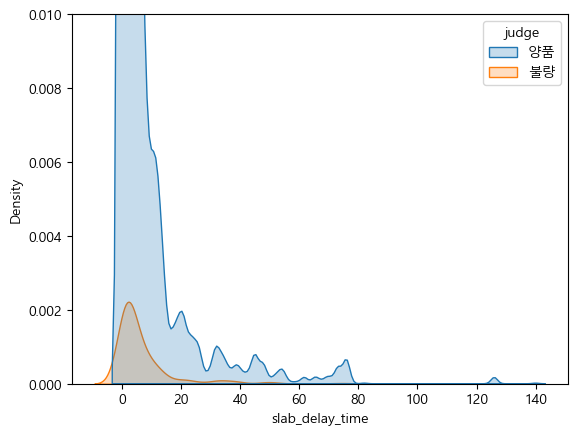

In [812]:
col = 'slab_delay_time'
sns.kdeplot(data=df, x=col, hue='judge', fill=True)
plt.ylim(0, 0.010)
plt.show()
# plt.figure(figsize=(10, 6))

# data_min = df[col].min()
# data_max = df[col].max()
# bins = np.linspace(data_min, data_max, 30)

# good = df[df['judge'] == 'ÏñëÌíà'][col]
# bad = df[df['judge'] == 'Î∂àÎüâ'][col]

# good_hist, _ = np.histogram(good, bins=bins)
# bad_hist, _ = np.histogram(bad, bins=bins)

# good_ratio = good_hist / good.sum()
# bad_ratio = bad_hist / bad.sum()

# bin_centers = 0.5 * (bins[1:] + bins[:-1])
# bin_width = bins[1] - bins[0]

# plt.plot(bin_centers, good_ratio, color='blue', marker='o', linestyle='-', label='ÏñëÌíà (line)')
# plt.plot(bin_centers, bad_ratio, color='red', marker='o', linestyle='-', label='Î∂àÎüâ (line)')

# tick_interval = (data_max - data_min) / 30 
# xticks = np.arange(data_min, data_max + tick_interval, tick_interval)
# plt.xticks(xticks, rotation=90) 

# plt.xlabel(f'{col}')
# plt.ylabel('ÎπÑÏú® (Ìï¥Îãπ Íµ¨Í∞Ñ Ïàò / Ï†ÑÏ≤¥ Ïàò)')
# plt.title(f'{col} Histogram by Judge (Ratio)')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [136]:
# cols = [col]
# for col in cols:
#     # ÏÑ§Î™ÖÎ≥ÄÏàòÏùò bin Í≤ΩÍ≥Ñ ÏÑ§Ï†ï
#     bins = np.linspace(df[col].min(), df[col].max(), num=30)
    
#     # Í∞Å binÏóê ÎåÄÌïú ÏñëÌíà, Î∂àÎüâ, Ï†ÑÏ≤¥ Í∞úÏàò Í≥ÑÏÇ∞
#     df['bin'] = pd.cut(df[col], bins=bins, include_lowest=True)
    
#     # binÎ≥Ñ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
#     bin_counts = df.groupby('bin')['judge'].value_counts().unstack(fill_value=0)
#     bin_total_counts = df.groupby('bin').size()
    
#     # ÎπÑÏú® Í≥ÑÏÇ∞
#     bin_counts['Íµ¨Í∞Ñ_ÎÇ¥_ÏñëÌíà_ÎπÑÏú®'] = bin_counts['ÏñëÌíà'] / bin_total_counts
#     bin_counts['Íµ¨Í∞Ñ_ÎÇ¥_Î∂àÎüâ_ÎπÑÏú®'] = bin_counts['Î∂àÎüâ'] / bin_total_counts
    
#     fig, ax1 = plt.subplots(figsize=(10, 5))
    
#     # Î∂àÎüâ Í∞ØÏàò Í∑∏ÎûòÌîÑ
#     ax1.bar(bin_counts.index.astype(str), bin_counts['Î∂àÎüâ'], label='Î∂àÎüâ Í∞ØÏàò', align='center', color='skyblue', alpha=0.7)
#     ax1.set_xlabel(f'{col} Bins')
#     ax1.set_ylabel('Î∂àÎüâÌíà Í∞ØÏàò', color='blue')
#     ax1.tick_params(axis='y', labelcolor='blue')
#     ax1.set_title(f'{col} Íµ¨Í∞ÑÎ≥Ñ Î∂àÎüâ Í∞ØÏàò')
#     ax1.set_xticks(range(len(bin_counts.index)))
#     ax1.set_xticklabels([str(interval) for interval in bin_counts.index], rotation=45, ha='right')
    
#     # Î∂àÎüâ ÎπÑÏú® Í∑∏ÎûòÌîÑ
#     ax2 = ax1.twinx()
#     # ax2.bar(bin_counts.index.astype(str), bin_counts['Î∂àÎüâ'], label='Î∂àÎüâ ÎπÑÏú®', align='center', color='red', alpha=0.7)
#     ax2.plot(range(len(bin_counts.index)), bin_counts['Íµ¨Í∞Ñ_ÎÇ¥_Î∂àÎüâ_ÎπÑÏú®'],label='Î∂àÎüâ ÎπÑÏú® (line)', color='darkred', marker='o', linestyle='-')
#     ax2.set_ylabel('Î∂àÎüâ ÎπÑÏú® (Î∂àÎüâ Í∞úÏàò / Íµ¨Í∞ÑÎ≥Ñ Ï†ÑÏ≤¥ Í∞úÏàò)', color='red')
#     ax2.tick_params(axis='y', labelcolor='red')
    
#     lines, labels = ax1.get_legend_handles_labels()
#     lines2, labels2 = ax2.get_legend_handles_labels()
#     ax2.legend(lines + lines2, labels + labels2, loc='upper left')

#     ax2.set_ylim(0, 0.2)

#     plt.tight_layout()
#     plt.show()
    
#     total_data_count = len(df)
#     bin_counts['Î∂àÎüâÎ•†_Ï†ÑÏ≤¥Í∏∞Ï§Ä'] = bin_counts['Î∂àÎüâ'] / total_data_count
#     bin_counts['ÎàÑÏ†Å_Î∂àÎüâÎ•†'] = bin_counts['Î∂àÎüâ'].cumsum() / total_data_count
    
#     from tabulate import tabulate
    
#     print_table = bin_counts[['ÏñëÌíà', 'Î∂àÎüâ', 'Íµ¨Í∞Ñ_ÎÇ¥_ÏñëÌíà_ÎπÑÏú®', 'Íµ¨Í∞Ñ_ÎÇ¥_Î∂àÎüâ_ÎπÑÏú®', 'Î∂àÎüâÎ•†_Ï†ÑÏ≤¥Í∏∞Ï§Ä', 'ÎàÑÏ†Å_Î∂àÎüâÎ•†']].copy()
#     print_table[['Íµ¨Í∞Ñ_ÎÇ¥_ÏñëÌíà_ÎπÑÏú®', 'Íµ¨Í∞Ñ_ÎÇ¥_Î∂àÎüâ_ÎπÑÏú®', 'Î∂àÎüâÎ•†_Ï†ÑÏ≤¥Í∏∞Ï§Ä', 'ÎàÑÏ†Å_Î∂àÎüâÎ•†']] *= 100
    
#     print("\nÍµ¨Í∞ÑÎ≥Ñ ÏñëÌíà/Î∂àÎüâ Î∞è ÎπÑÏú® (%):")
#     table = tabulate(
#         print_table,
#         headers='keys',
#         tablefmt='pretty',
#         floatfmt=".3f%%",
#         showindex=True
#     )
#     print(table)

### ‚ìñ Î∂àÎüâÎ•† Í≥ÑÏÇ∞Í≥µÏãù

In [819]:
col = 'slab_delay_time'
a = 1 
b = 0
filtered_df = df[df['judge']=='Î∂àÎüâ']
bad_count = len(filtered_df[(filtered_df[col] < a)])
total_count = len(df)

defect_rate = bad_count / total_count * 100
print("Î∂àÎüâÎ•†:", defect_rate)
print(bad_count)

Î∂àÎüâÎ•†: 0.06771340302171061
16


# 5. Î™®Îç∏ÎßÅ

In [90]:
pip install imbalanced-learn

In [169]:
# ÏÉòÌîåÎßÅ ÎùºÏù¥Î∏åÎü¨Î¶¨
from imblearn.over_sampling import ADASYN, RandomOverSampler, KMeansSMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.model_selection import train_test_split

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Î™®Îç∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, precision_recall_curve

### Î™®Îç∏ÎßÅ Ï†Ñ Ï†ÑÏ≤òÎ¶¨
- Î∂àÎüâÌíà ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
- Î∂àÎüâÌíà Ïò§Î≤ÑÏÉòÌîåÎßÅ
  - SMOTETomek 
  - Borderline SMOTE
  - ADASYN 
- GridSearchCV

In [162]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†Ñ ÏΩîÎìú
# # ÏÑ§Î™ÖÎ≥ÄÏàò ÏÑ†ÌÉù
# selected_columns = ["delta_ferrite", "f_jangip_temp", "f_pre_temp",
#                     "f_sock_temp", "f_sock_interval", "ap_line_speed", "slab_delay_time",
#                     "coil_delay_time", "rm4_temp", "mlac_ratio"]

# # ÏÑ§Î™ÖÎ≥ÄÏàò, Î™©ÌëúÎ≥ÄÏàò Î∂ÑÎ¶¨
# df_raw_x = df.drop("judge", axis = 1, inplace = False)
# df_raw_x = df_raw_x[selected_columns]
# df_raw_x = pd.get_dummies(df_raw_x)

# df_raw_y = df["judge"].map(lambda x: 1 if x=='Î∂àÎüâ' else 0)

# # Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ
# ## - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# x_train, x_test, y_train, y_test = train_test_split(df_raw_x, df_raw_y, test_size=0.3, stratify=df_raw_y, random_state=1234)

# ## - Î∂àÎüâÌíà Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ ÏúÑÌïú ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# # bad_x_train, _, bad_y_train, _ = train_test_split(bad_filtered_x, bad_filtered_y, test_size=0.3, stratify=bad_filtered_y, random_state=42)

# ## ÏÜåÏàò ÌÅ¥ÎûòÏä§Îßå Ïò§Î≤ÑÏÉòÌîåÎßÅ
# ros = RandomOverSampler(sampling_strategy={1: 16100}, random_state=42)
# x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

# ## - Ïò§Î≤ÑÏÉòÌîåÎßÅ(BorderlineSMOTE)1 Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# smote = BorderlineSMOTE(random_state=42)
# x_train_smote, y_„Öä  train_smote = smote.fit_resample(x_train, y_train)

# ## - Ïò§Î≤ÑÏÉòÌîåÎßÅ(ADASYN)2 Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# adasyn = ADASYN(random_state=42)
# x_train_ad, y_train_ad = adasyn.fit_resample(x_train, y_train)

# ## - Ïò§Î≤ÑÏÉòÌîåÎßÅ(SMOTEENN)3 Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# smote_enn = SMOTEENN(random_state=42)
# x_train_senn, y_train_senn = smote_enn.fit_resample(x_train, y_train)

# ## - Ïñ∏ÎçîÏÉòÌîåÎßÅ
# rus = RandomUnderSampler(random_state=42)
# x_train_under, y_train_under = rus.fit_resample(x_train, y_train)

# ## ÏÉòÌîåÎßÅ Í≤∞Í≥º ÌôïÏù∏
# from collections import Counter

# print("ÏõêÎ≥∏ y_train Î∂ÑÌè¨:", Counter(y_train))
# print("Ros y_train Î∂ÑÌè¨:", Counter(y_train_ros))
# print("BorderlineSMOTE y_train Î∂ÑÌè¨:", Counter(y_train_smote))
# print("ADASYN y_train Î∂ÑÌè¨:", Counter(y_train_ad))
# print("SMOTEENN y_train Î∂ÑÌè¨:", Counter(y_train_senn))
# print("UnderSampling y_train Î∂ÑÌè¨:", Counter(y_train_under))

In [290]:
selected_columns = ['delta_ferrite',
       'ingre_cr', 'ingre_ni', 'ingre_s',
       'tundish_temp', 'mlac_ratio', 'f_jangip_temp', 
       'f_ldg', 'f_pre_temp','f_jangip_gubun', 'sm_plant',
       'f_heat_temp', 'f_sock_temp', 'f_pre_interval', 
       'f_sock_interval',
       'hr_thick', 'hr_width', 'rm4_temp','ap_line_speed']

# Î≤îÏ£ºÌòï, ÏàòÏπòÌòï Í∞ÅÍ∞Å ÎÇòÎà†ÏÑú ÎçîÎØ∏Ìôî
categorical_cols = ['f_jangip_gubun', 'sm_plant']
numeric_selected = [col for col in selected_columns if col not in categorical_cols]

df_features = df.drop(columns=['judge'])
df_dummy_features = pd.get_dummies(df_features, columns=categorical_cols)
df_dummy = pd.concat([df_dummy_features, df['judge']], axis=1)
dummy_columns = [col for col in df_dummy.columns if any(c in col for c in categorical_cols)]
final_selected_columns = numeric_selected + dummy_columns

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
df_defect = df_dummy[df_dummy["judge"] == "Î∂àÎüâ"]
df_defect_x = df_defect[final_selected_columns]

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_defect_x)
df_defect["cluster"] = clusters

df_cluster_sampled = df_defect.groupby("cluster").sample(frac=1.0, random_state=42)

# 
df_good = df_dummy[df_dummy["judge"] == "ÏñëÌíà"]
df_sampled = pd.concat([df_good, df_cluster_sampled])

X = df_sampled[final_selected_columns]
y = df_sampled["judge"].map(lambda x: 1 if x == "Î∂àÎüâ" else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [291]:
# Ïò§Î≤ÑÏÉòÌîåÎßÅ (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï†ÅÏö©!)
smote = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

smote2 = BorderlineSMOTE(random_state=42)
X_train_res2, y_train_res2 = smote2.fit_resample(X_train, y_train)

adasyn = ADASYN(random_state=42)
X_train_res3, y_train_res3 = adasyn.fit_resample(X_train, y_train)

## BalancedRandomForestClassifier

#### - smoteTomek ÏÉòÌîåÎßÅ ÌôúÏö©

In [128]:
param_grid = {
    'n_estimators': [40, 50, 100, 150],
    'max_depth': [5, 10, 15, 20, 30, 40, 50], 
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

clf = BalancedRandomForestClassifier(random_state=42)
grid_tree = RandomizedSearchCV(clf, param_distributions=param_grid, refit=True, scoring='f1', n_jobs=-1)
grid_tree.fit(X_train_res, y_train_res)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 50}
best score :  0.9900413814537293


In [152]:
clf = BalancedRandomForestClassifier(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=3,
    max_depth=50,
    class_weight='balanced', 
    random_state=42)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4600
           1       0.35      0.46      0.40       126

    accuracy                           0.96      4726
   macro avg       0.67      0.72      0.69      4726
weighted avg       0.97      0.96      0.97      4726



#### - ‚úÖ BorderlineSMOTE ÏÉòÌîåÎßÅ ÌôúÏö©

In [143]:
param_grid = {
    'n_estimators': [40, 50, 100, 150],
    'max_depth': [5, 10, 15, 20, 30, 40, 50], 
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

clf = BalancedRandomForestClassifier(random_state=42)
grid_tree = RandomizedSearchCV(clf, param_distributions=param_grid, refit=True, scoring='f1', n_jobs=-1)
grid_tree.fit(X_train_res2, y_train_res2)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 30}
best score :  0.9901124713241003


In [163]:
clf = BalancedRandomForestClassifier(
    n_estimators=100,
    min_samples_split=10,
    min_samples_leaf=3,
    max_depth=30,
    class_weight='balanced', 
    random_state=42)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] 

threshold = 0.4
y_pred_thresh = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4600
           1       0.52      0.35      0.42       126

    accuracy                           0.97      4726
   macro avg       0.75      0.67      0.70      4726
weighted avg       0.97      0.97      0.97      4726



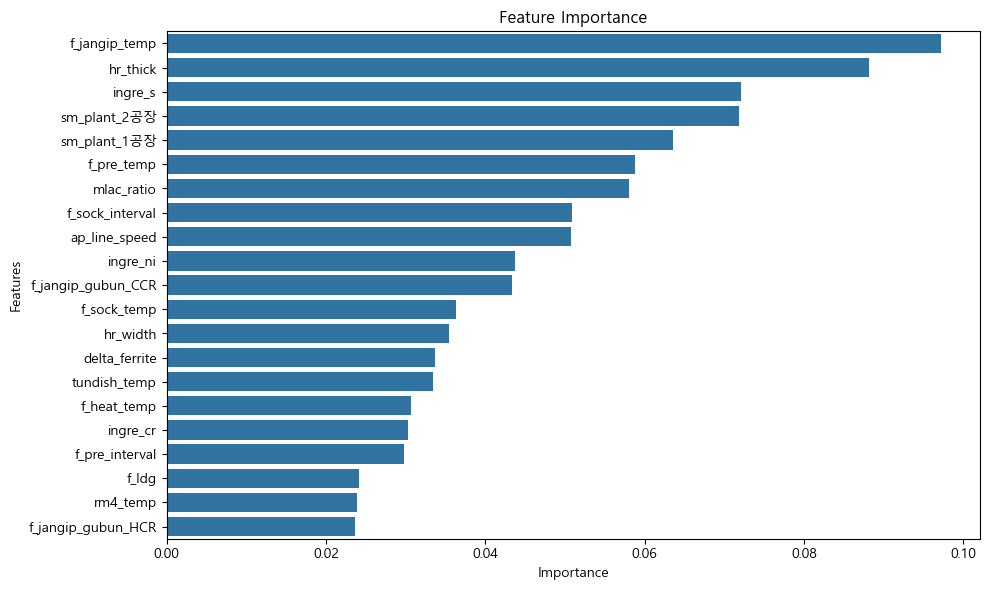

In [165]:
importance = pd.Series(clf.feature_importances_, index=X_train_res.columns)
importance = importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#### - ADASYN ÏÉòÌîåÎßÅ ÌôúÏö©

In [154]:
param_grid = {
    'n_estimators': [40, 50, 100, 150],
    'max_depth': [5, 10, 15, 20, 30, 40, 50], 
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

clf = BalancedRandomForestClassifier(random_state=42)
grid_tree = RandomizedSearchCV(clf, param_distributions=param_grid, refit=True, scoring='f1', n_jobs=-1)
grid_tree.fit(X_train_res3, y_train_res3)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 15}
best score :  0.9654220699842938


In [166]:
clf = BalancedRandomForestClassifier(
    n_estimators=150,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=15,
    class_weight='balanced', 
    random_state=42)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4600
           1       0.33      0.29      0.31       126

    accuracy                           0.97      4726
   macro avg       0.66      0.64      0.65      4726
weighted avg       0.96      0.97      0.96      4726



## DecisionTreeClassifier

#### - smoteTomek ÏÉòÌîåÎßÅ ÌôúÏö©

In [170]:
params = {
    'max_depth': [i for i in range(1, 20, 3)],
    'min_samples_split': [i for i in range(10, 80, 10)],
    'min_samples_leaf': [i for i in range(10, 80, 10)]
}

clf = DecisionTreeClassifier(random_state=42)
grid_tree = GridSearchCV(clf, param_grid=params, refit=True, scoring='f1')
grid_tree.fit(X_train_res, y_train_res)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'max_depth': 19, 'min_samples_leaf': 10, 'min_samples_split': 10}
best score :  0.9473730392771957


In [222]:
clf = DecisionTreeClassifier(max_depth=19, 
                            min_samples_leaf=10, 
                            min_samples_split=10,
                            class_weight='balanced',
                            random_state=42)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] 

threshold = 0.4
y_pred_thresh = (y_proba >= threshold).astype(int)
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4600
           1       0.17      0.36      0.23       126

    accuracy                           0.94      4726
   macro avg       0.57      0.65      0.60      4726
weighted avg       0.96      0.94      0.95      4726



#### - BorderlineSMOTE ÏÉòÌîåÎßÅ ÌôúÏö©

In [208]:
params = {
    'max_depth': [i for i in range(1, 20, 3)],
    'min_samples_split': [i for i in range(10, 80, 10)],
    'min_samples_leaf': [i for i in range(10, 80, 10)]
}

clf = DecisionTreeClassifier(random_state=42)
grid_tree = RandomizedSearchCV(clf, param_distributions=params, refit=True, scoring='f1')
grid_tree.fit(X_train_res2, y_train_res2)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'min_samples_split': 70, 'min_samples_leaf': 20, 'max_depth': 19}
best score :  0.9413040274478097


In [214]:
clf = DecisionTreeClassifier(max_depth=19, 
                            min_samples_leaf=20, 
                            min_samples_split=70,
                            class_weight='balanced',
                            random_state=42)
clf.fit(X_train_res2, y_train_res2)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4600
           1       0.14      0.29      0.18       126

    accuracy                           0.93      4726
   macro avg       0.56      0.62      0.57      4726
weighted avg       0.96      0.93      0.94      4726



| Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏÑ±Îä•Ïù¥ ÎÇÆÏúºÎØÄÎ°ú Ìï¥Îãπ Î™®Îç∏ÏùÄ Ìå®Ïä§

## GradientBoosting

#### - ‚úÖ smoteTomek ÏÉòÌîåÎßÅ ÌôúÏö©

In [223]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2]
}

dtc = GradientBoostingClassifier(random_state=42)
grid_tree = RandomizedSearchCV(dtc, param_distributions=param_grid, refit=True, scoring='f1', n_jobs=-1, cv=3)
grid_tree.fit(X_train_res, y_train_res)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.05}
best score :  0.9874442526689587


In [312]:
clf = GradientBoostingClassifier(max_depth=10, 
                            min_samples_leaf=1, 
                            min_samples_split=10,
                            n_estimators=150,
                            learning_rate=0.05,
                            random_state=42)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] 

threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4600
           1       0.47      0.33      0.38       126

    accuracy                           0.97      4726
   macro avg       0.72      0.66      0.68      4726
weighted avg       0.97      0.97      0.97      4726



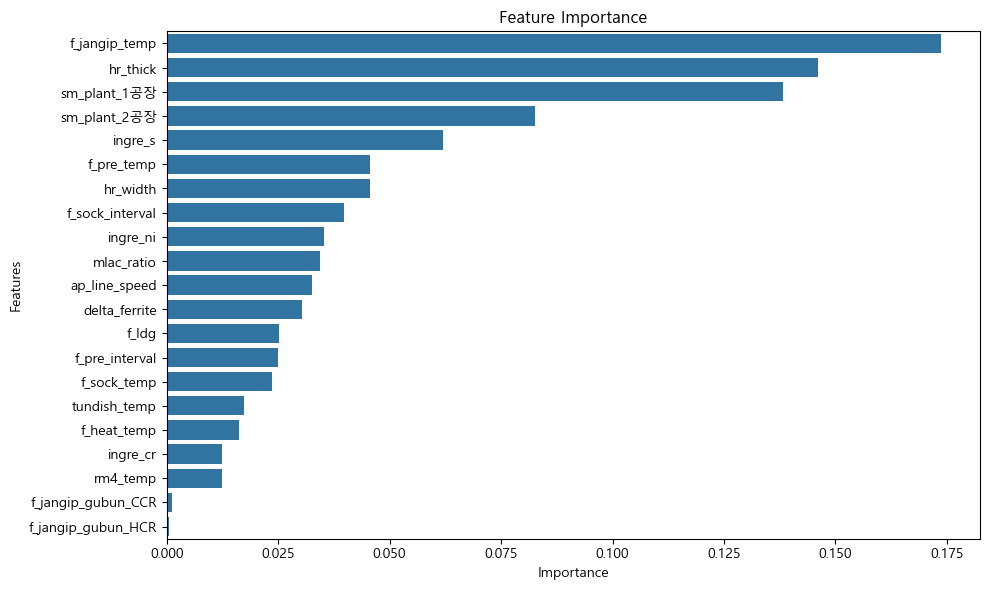

In [314]:
importance = pd.Series(clf.feature_importances_, index=X_train_res.columns)
importance = importance.sort_values(ascending=False)
# print(importance)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#### - BorderlineSMOTE ÏÉòÌîåÎßÅ ÌôúÏö©

In [223]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2]
}

dtc = GradientBoostingClassifier(random_state=42)
grid_tree = RandomizedSearchCV(dtc, param_distributions=param_grid, refit=True, scoring='f1', n_jobs=-1, cv=3)
grid_tree.fit(X_train_res2, y_train_res2)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.05}
best score :  0.9874442526689587


In [236]:
clf = GradientBoostingClassifier(max_depth=10, 
                            min_samples_leaf=1, 
                            min_samples_split=10,
                            n_estimators=150,
                            learning_rate=0.05,
                            random_state=42)
clf.fit(X_train_res2, y_train_res2)

y_pred = clf.predict(X_test)

print("classification_report:\n", classification_report(y_test, y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4600
           1       0.60      0.22      0.32       126

    accuracy                           0.98      4726
   macro avg       0.79      0.61      0.66      4726
weighted avg       0.97      0.98      0.97      4726



#### - ADASYN ÏÉòÌîåÎßÅ ÌôúÏö©

In [246]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2]
}

dtc = GradientBoostingClassifier(random_state=42)
grid_tree = RandomizedSearchCV(dtc, param_distributions=param_grid, refit=True, scoring='f1', n_jobs=-1, cv=3)
grid_tree.fit(X_train_res3, y_train_res3)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 10, 'learning_rate': 0.1}
best score :  0.9810942044004012


In [259]:
clf = GradientBoostingClassifier(max_depth=10, 
                            min_samples_leaf=5, 
                            min_samples_split=10,
                            n_estimators=150,
                            learning_rate=0.1,
                            random_state=42)
clf.fit(X_train_res3, y_train_res3)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] 

threshold = 0.1
y_pred_thresh = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4600
           1       0.42      0.37      0.39       126

    accuracy                           0.97      4726
   macro avg       0.70      0.68      0.69      4726
weighted avg       0.97      0.97      0.97      4726



## SVM

#### - smoteTomek ÏÉòÌîåÎßÅ ÌôúÏö©

In [260]:
v_feature_names = X_train_res.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(X_train_res)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)
X_test_scaled = scaler.transform(X_test)

In [261]:
param_grid = {
    'gamma': [0.1 * gamma for gamma in range(1, 11)],
    'C': [0.1 * c for c in range(1, 13)],
}

svc = SVC(random_state=42)
grid_tree = RandomizedSearchCV(svc, param_distributions=param_grid, refit=True, scoring='recall', n_jobs=-1, cv=3)
grid_tree.fit(df_x_scaled, y_train_res)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'gamma': 0.2, 'C': 1.2000000000000002}
best score :  0.9953244411560894


In [276]:
svc = SVC(C=1.2, gamma=0.2, random_state=42, class_weight='balanced')
svc.fit(df_x_scaled, y_train_res)

y_pred = svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4600
           1       0.38      0.31      0.34       126

    accuracy                           0.97      4726
   macro avg       0.68      0.65      0.66      4726
weighted avg       0.97      0.97      0.97      4726



## NN

#### - smoteTomek ÏÉòÌîåÎßÅ ÌôúÏö©

In [286]:
param_grid = {
    'activation': ["logistic", "tanh", "relu"],
    'solver': ["lbfgs", "sgd", "adam"],
    'batch_size': [20 * batch for batch in range(1, 10)],
}

nn = MLPClassifier(random_state=42, max_iter=1000)
grid_tree = RandomizedSearchCV(nn, param_distributions=param_grid, refit=True, scoring='recall', n_jobs=-1, cv=3)
grid_tree.fit(X_train_res, y_train_res)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)

best parameters :  {'solver': 'sgd', 'batch_size': 80, 'activation': 'logistic'}
best score :  1.0


In [296]:
clf = MLPClassifier(activation='relu', solver='adam', batch_size=80)

clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)

print("classification_report:\n", classification_report(y_test, y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.67      0.80      4600
           1       0.05      0.67      0.10       126

    accuracy                           0.67      4726
   macro avg       0.52      0.67      0.45      4726
weighted avg       0.96      0.67      0.78      4726



> NNÏùÄ 1Ïóê ÎåÄÌïú precisionÏù¥ ÎÑàÎ¨¥ ÎÇÆÏïÑ Îã§Î•∏ Ïò§Î≤ÑÏÉòÌîåÎßÅ Í≤ΩÏö∞Îäî Ìå®Ïä§ 

# 6. Î™®Îç∏ÎßÅ ÏÑ±Îä•ÎπÑÍµê

In [329]:
model_names = ["DecisionTree", "RandomForest", "GradientBoost", "NeuralNet"]
model_trainAccuracy = []
model_testAccuracy = []
model_precision = []
model_recall = []
model_f1score = []

# Î™®Îç∏Î≥Ñ ÌèâÍ∞Ä
# 1. Decision Tree
clf = DecisionTreeClassifier(max_depth=19, min_samples_leaf=10, min_samples_split=10,
                             class_weight='balanced', random_state=42)
clf.fit(X_train_res, y_train_res)
y_train_pred = clf.predict(X_train_res)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_proba >= 0.4).astype(int)

model_trainAccuracy.append(accuracy_score(y_train_res, y_train_pred))
model_testAccuracy.append(accuracy_score(y_test, y_pred_thresh))
model_precision.append(precision_score(y_test, y_pred_thresh, zero_division=0))
model_recall.append(recall_score(y_test, y_pred_thresh))
model_f1score.append(f1_score(y_test, y_pred_thresh, zero_division=0))

# 2. Random Forest
clf = BalancedRandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=3,
                                     max_depth=30, class_weight='balanced', random_state=42)
clf.fit(X_train_res, y_train_res)
y_train_pred = clf.predict(X_train_res)
y_pred = clf.predict(X_test)
y_pred_thresh = (y_proba >= 0.4).astype(int)
model_trainAccuracy.append(accuracy_score(y_train_res, y_train_pred))
model_testAccuracy.append(accuracy_score(y_test, y_pred_thresh))
model_precision.append(precision_score(y_test, y_pred_thresh, zero_division=0))
model_recall.append(recall_score(y_test, y_pred_thresh))
model_f1score.append(f1_score(y_test, y_pred_thresh, zero_division=0))

# 3. Gradient Boosting
clf = GradientBoostingClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10,
                                 n_estimators=150, learning_rate=0.05, random_state=42)
clf.fit(X_train_res, y_train_res)
y_train_pred = clf.predict(X_train_res)
y_proba = clf.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_proba >= 0.3).astype(int)
model_trainAccuracy.append(accuracy_score(y_train_res, y_train_pred))
model_testAccuracy.append(accuracy_score(y_test, y_pred_thresh))
model_precision.append(precision_score(y_test, y_pred_thresh, zero_division=0))
model_recall.append(recall_score(y_test, y_pred_thresh))
model_f1score.append(f1_score(y_test, y_pred_thresh, zero_division=0))

# 4. Neural Net
clf = MLPClassifier(activation='relu', solver='adam', batch_size=80, random_state=42)
clf.fit(X_train_res, y_train_res)
y_train_pred = clf.predict(X_train_res)
y_pred = clf.predict(X_test)
model_trainAccuracy.append(accuracy_score(y_train_res, y_train_pred))
model_testAccuracy.append(accuracy_score(y_test, y_pred))
model_precision.append(precision_score(y_test, y_pred, zero_division=0))
model_recall.append(recall_score(y_test, y_pred))
model_f1score.append(f1_score(y_test, y_pred, zero_division=0))

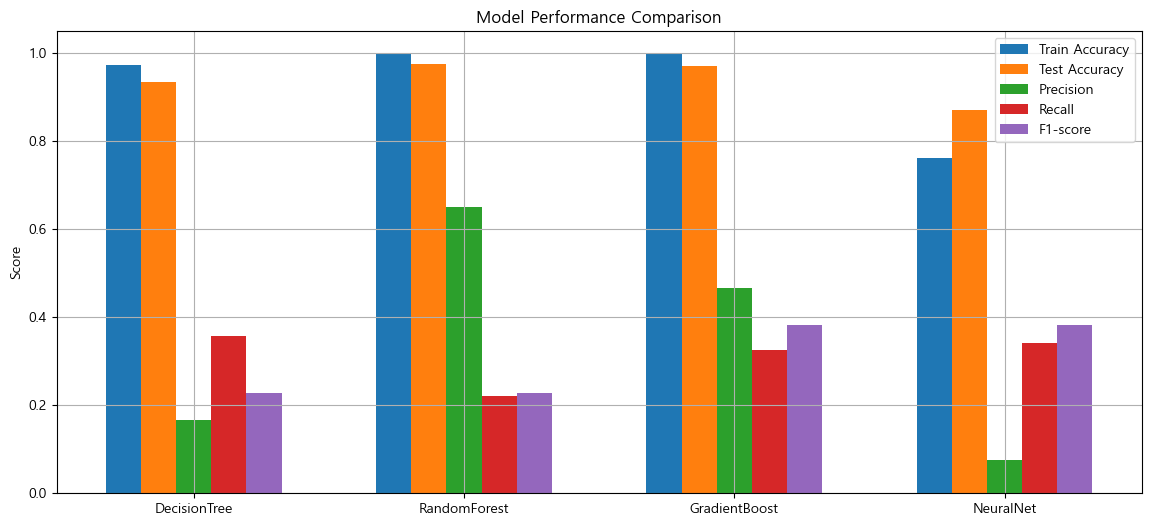

In [311]:
x = np.arange(len(model_names)) 
width = 0.13

plt.figure(figsize=(14,6))
plt.bar(x - width*2, model_trainAccuracy, width, label='Train Accuracy')
plt.bar(x - width, model_testAccuracy, width, label='Test Accuracy')
plt.bar(x, model_precision, width, label='Precision')
plt.bar(x + width, model_recall, width, label='Recall')
plt.bar(x + width*2, model_f1score, width, label='F1-score')

plt.xticks(x, model_names)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [328]:
# df.to_csv('a2_sts304.csv', encoding='euc-kr', index=False)